# Lab 7 (Mobile Phone Sensor Project) Log Book

**Sadman Ahmed Shanto**

---

---
## Table of Contents:
* Background and Theory
* Experiment 1
* Experiment 2
* Project Questions
* Conclusion & Summary
---

# Background and Theory:

## Mobile Phone Sensors

Android App used (02/7/21 -02/13/21): **Physics Toolbox Suite** 

Android App used (02/13/21 -02/19/21): **MATLAB** 

## Triaxial Accelerometer 

Triaxial accelerometer is a sensor that returns an estimate of acceleration along the x, y and z axes from which velocity and displacement can also be estimated.

## Filters

## Fourier Transforms

## Experiments Chosen: 

1. Extraction of the value of $g$ from accelerometer data
2. Fourier Analysis of Human Motion Data


# Experiment 1: *Extraction of the value of $g$ from accelerometer data*

## Methodology

- We have time series acceleration data in three dimensions - $x,y,z$.
- Each time series $\rightarrow$ linear acceleration of body + linear acceleration due to gravity
- We use a a digital low pass filter in order to separate the AC component from the DC component in each time series. 
    - AC component (high frequency) $\rightarrow$ dynamic motion of body
    - DC component (low frequency) $\rightarrow$ influence of gravity
- Set Cut-Off frequency, record sampling rate and solve for the coefficients - $a$ and $b$- where $A_{DC}$ is filtered output data and $A$ is raw input data.
$$A_{DC}[n] = aA[n]+bA_{DC}[n-1]$$

- Repeat the process for all spatial axes and store the low pass filter time series
- Calculate the magnitude of the low pass filter time series.
$$A_{g} = \sqrt{(A_{DC_x}^{2} + A_{DC_y}^{2} + A_{DC_z}^{2})} $$
- $g$ is the arithmetic mean of the low pass filter time series, $A_{g}$
$$ g = mean(A_{g}) $$

---

## Data From Mohammad's Drive From LBK to DFW

Mohammad recorded a data set while driving from Lubbock to Dallas. We are using this dataset to try and extract the gravitational field strength, $g$, information from. If time permits, we also plan on performing some other experiments using this data set.

The data set contains information for roughly 2.68 hours.

In [3]:
f1 = "mohammad_data.csv"
df = pd.read_csv(f1,sep=",")
df.drop(columns=['Unnamed: 20'], axis=1)
df = df.iloc[1:]
df

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,Bx,By,Bz,Azimuth,Pitch,Roll,Latitude,Longitude,Speed (m/s),Unnamed: 20
1,0.056,0.1107,0.5201,1.0128,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.000,0.0000,0.0000,33.291775,-101.503817,34.480000,NaN
2,0.056,0.1107,0.5201,1.0128,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.000,0.0000,0.0000,33.291775,-101.503817,34.480000,NaN
3,0.068,0.1142,0.4607,0.9509,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.000,0.0000,0.0000,33.291775,-101.503817,34.480000,NaN
4,0.085,0.0506,0.4603,0.8793,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.000,0.0000,0.0000,33.291775,-101.503817,34.480000,NaN
5,0.085,0.0506,0.4603,0.8793,0.1625,0.1021,0.2422,0.0000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.000,0.0000,0.0000,33.291775,-101.503817,34.480000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469700,9637.865,0.0426,0.4406,0.9823,-0.6587,0.0841,-0.0047,-0.2531,-0.0021,0.0393,...,7.7227,-28.248,-19.7369,207.868,-26.7769,3.8516,32.410791,-98.767946,30.879999,NaN
469701,9637.879,0.0928,0.4476,1.0419,-0.6587,0.0841,-0.0047,-0.2531,-0.0021,0.0393,...,7.7227,-28.248,-19.7369,207.868,-26.7769,3.8516,32.410791,-98.767946,30.879999,NaN
469702,9637.880,0.0928,0.4476,1.0419,-0.1249,0.0939,0.8053,-0.2531,-0.0021,0.0393,...,7.7227,-28.248,-19.7369,207.868,-26.7769,3.8516,32.410917,-98.767659,30.350000,NaN
469703,9637.888,0.0600,0.4377,1.0173,-0.1249,0.0939,0.8053,-0.2531,-0.0021,0.0393,...,7.7227,-28.248,-19.7369,207.868,-26.7769,3.8516,32.410917,-98.767659,30.350000,NaN


The collected data set contained the above information. Note that we are also provided with the gForce data which we might use later for verification of our analysis.

In [106]:
def getCaption(fig_num,cap,sep=-0.1):
    txt="Fig {}: {}".format(fig_num, cap)
    plt.figtext(0.5, sep, txt, wrap=True, horizontalalignment='center', fontsize=14)

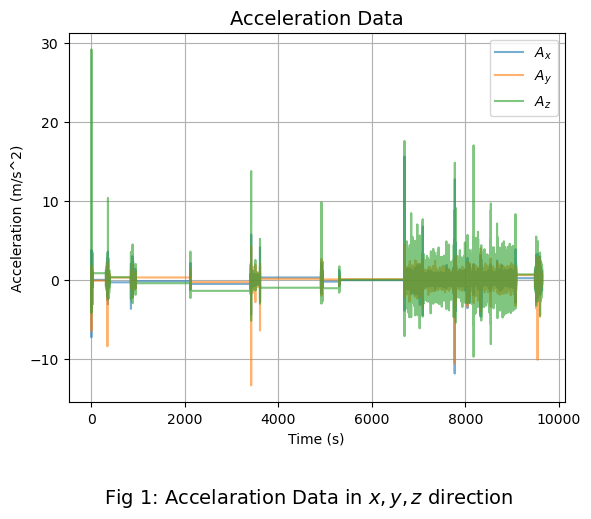

In [17]:
plt.plot(df.time.values, df.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(df.time.values, df.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(df.time.values, df.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()
getCaption(1, r"Accelaration Data in $x,y,z$ direction")
plt.show()

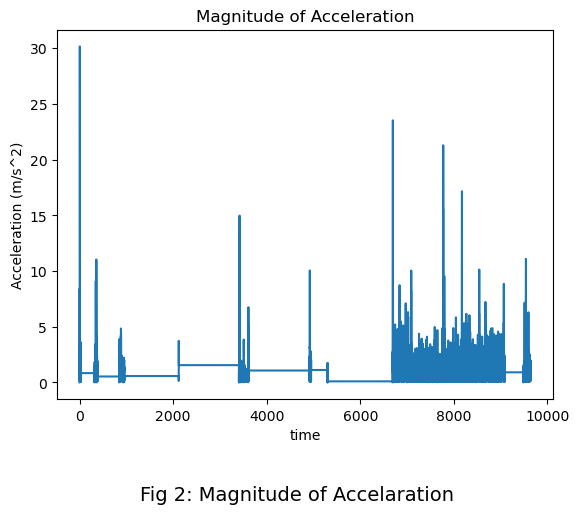

In [18]:
a_mag = np.sqrt(df["ax"].values**2+df["az"].values**2+df["ay"].values**2)
plt.title("Magnitude of Acceleration")
plt.plot(df["time"].values, a_mag)
plt.xlabel("time")
plt.ylabel("Acceleration (m/s^2)")
getCaption(2, r"Magnitude of Accelaration")
plt.show()

Now that we have such data. We need to implement the filters to extract the value of $g$.

In [75]:
from scipy import signal
import matplotlib.pyplot as plt

def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

def getFilteredData(x, cutoff_frequency, sample_rate):
    y =  butter_lowpass_filter(x, cutoff_frequency, sample_rate/2)
    diff_y = np.array(x)-np.array(y)
    return y, diff_y

Calculating the sample rate,$f_{sr}$, from the phone using the following formula:

$$f_{sr} = \frac{\text{# of events recorded}}{\text{time of trial (s)}} Hz$$

Using the value for cutoff_frequency, $f_{co}$, defined in **Section 2.3**.

In [25]:
x = df.ax.values
y = df.ay.values
z = df.az.values

sample_rate = round(len(df.index) / df.time.values[-1]) #hertz
cutoff_frequency = 0.1 #hertz
signal_lenght = len(df.index)

In [26]:
A_DCx, diff_x = getFilteredData(x, cutoff_frequency, sample_rate)
A_DCy, diff_y = getFilteredData(y, cutoff_frequency, sample_rate)
A_DCz, diff_z = getFilteredData(z, cutoff_frequency, sample_rate)

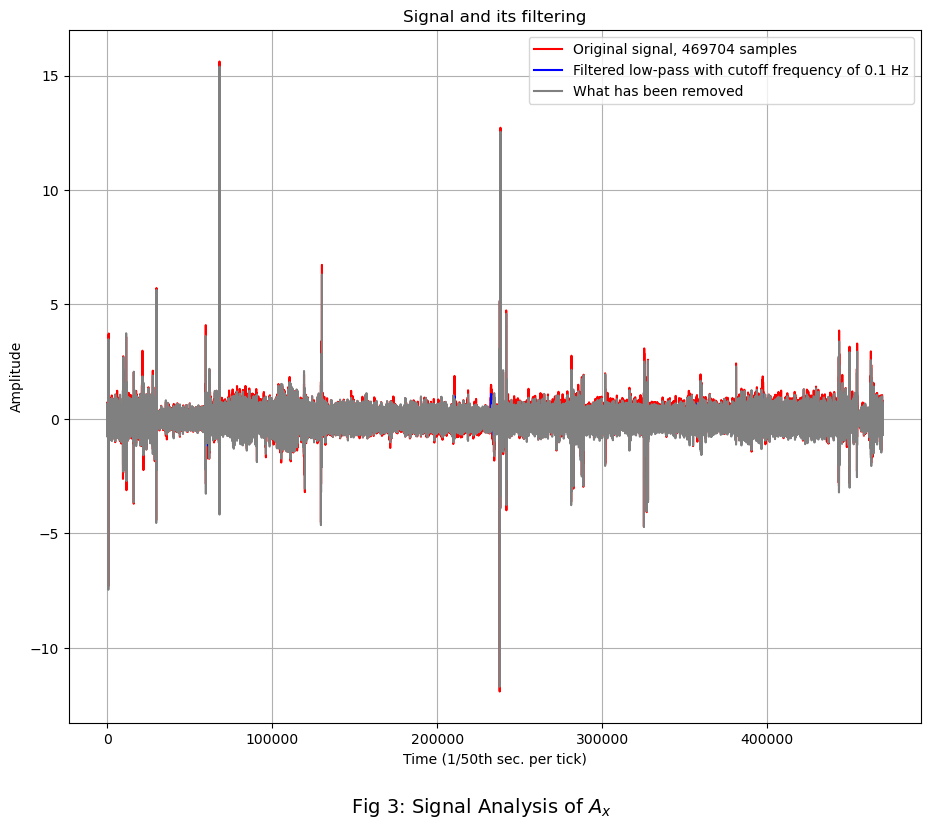

In [30]:
plt.figure(figsize=(11, 9))
plt.plot(x, color='red', label="Original signal, {} samples".format(signal_lenght))
plt.plot(A_DCx, color='blue', label="Filtered low-pass with cutoff frequency of {} Hz".format(cutoff_frequency))
plt.plot(diff_x, color='gray', label="What has been removed")
plt.title("Signal and its filtering")
plt.xlabel('Time (1/50th sec. per tick)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid()
getCaption(3,r"Signal Analysis of $A_{x}$",sep=0.01)
plt.show()

Now, calculating the value of $g$ from the data set.

In [31]:
A_g = np.sqrt(A_DCx**2+A_DCy**2+A_DCz**2)
g = sum(A_g)/len(A_g)
g

0.19378453626170816

The value of calculated $g$ is $\sim 0.19 \frac{m}{s^2}$ which is in no where close to the expected value of $9.81 \frac{m}{s^2}$. The difference points out either our data acquisition or the filtering process is incorrect.

---

## Data From Mohammad's Flight From IAH to LBK

Mohammad recorded a data set while flying from Houston to Lubbock. We are using this dataset to try and extract the gravitational field strength, $g$, information from. We are using the same device (Mohammad's phone) and same app to investigate what caused the error from the previous run.

In [33]:
f2 = "mohammad2.csv"
df2 = pd.read_csv(f2,sep=",")
df2.drop(columns=['Unnamed: 20'], axis=1)
df2 = df2.iloc[1:]
df2

,time,gFx,gFy,gFz,ax,ay,az,wx,wy,wz,...,Bx,By,Bz,Azimuth,Pitch,Roll,Latitude,Longitude,Speed (m/s),Unnamed: 20
1,0.183,-0.0262,0.7371,0.6736,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,29.985435,-95.352087,0.53,NaN
2,0.213,-0.0262,0.7371,0.6736,0.0000,0.0000,0.0000,-0.0326,-0.0304,0.0131,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,29.985435,-95.352087,0.53,NaN
3,0.224,-0.0262,0.7371,0.6736,0.0000,0.0000,0.0000,-0.0326,-0.0304,0.0131,...,-18.8250,-28.6125,15.1875,0.0000,0.0000,0.0000,29.985435,-95.352087,0.53,NaN
4,0.244,-0.0262,0.7371,0.6736,0.0000,0.0000,0.0000,-0.0326,-0.0304,0.0131,...,-18.8250,-28.6125,15.1875,0.0000,0.0000,0.0000,29.985435,-95.352087,0.53,NaN
5,0.245,-0.0262,0.7371,0.6736,0.0000,0.0000,0.0000,-0.0326,-0.0304,0.0131,...,-18.8250,-28.6125,15.1875,0.0000,0.0000,0.0000,29.985435,-95.352087,0.53,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137487,13492.824,-0.0131,0.1868,0.9797,-0.0132,-0.0132,-0.0035,-0.0001,-0.0013,0.0005,...,-13.2938,-37.0125,-19.4250,155.3889,-11.0014,-0.6229,33.657486,-101.822093,0.26,NaN
137488,13492.835,-0.0131,0.1868,0.9797,-0.0132,-0.0132,-0.0035,0.0822,-0.0195,0.0001,...,-13.2938,-37.0125,-19.4250,155.3889,-11.0014,-0.6229,33.657486,-101.822093,0.26,NaN
137489,13492.844,-0.0131,0.1868,0.9797,-0.0198,-0.0491,0.0288,0.0822,-0.0195,0.0001,...,-13.2938,-37.0125,-19.4250,155.3889,-11.0014,-0.6229,33.657486,-101.822093,0.26,NaN
137490,13492.845,-0.0131,0.1868,0.9797,-0.0198,-0.0491,0.0288,0.0822,-0.0195,0.0001,...,-13.2938,-37.0125,-19.4250,155.3794,-10.9979,-0.6439,33.657486,-101.822093,0.26,NaN


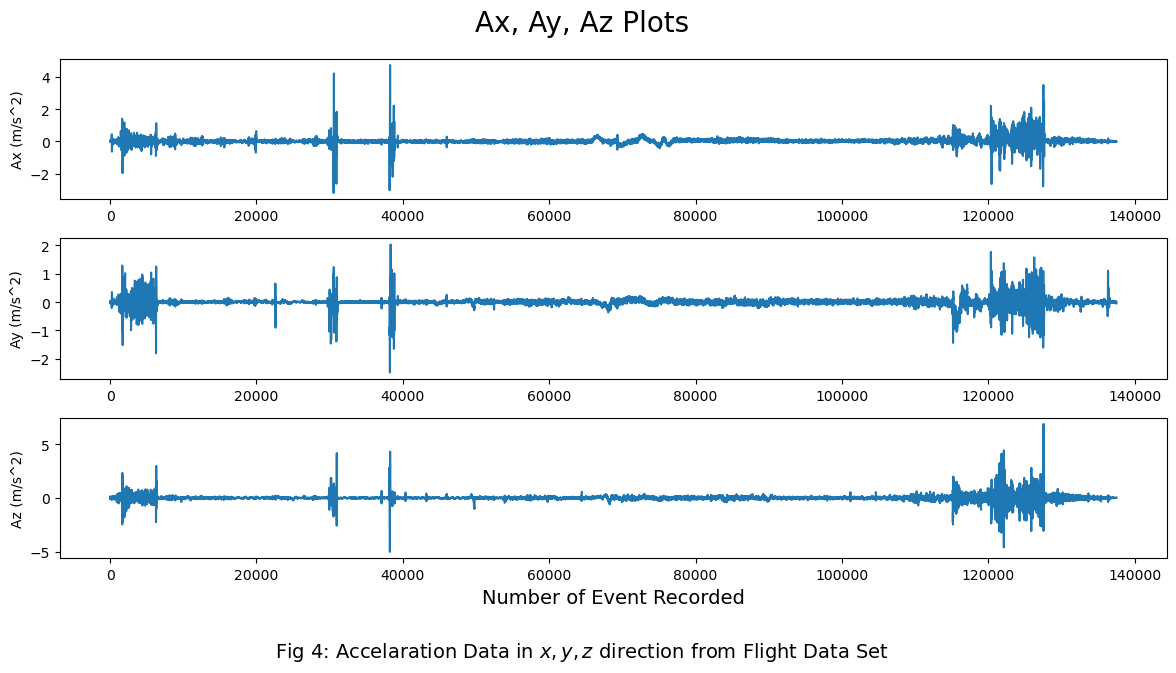

In [36]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(12,6))
plt.suptitle("Ax, Ay, Az Plots", fontsize=20)

a1 = df2.ax.plot(ax = axes[0], subplots=True) 
a1[0].set_ylabel("Ax (m/s^2)")

a2 = df2.ay.plot(ax = axes[1],subplots=True)
a2[0].set_ylabel("Ay (m/s^2)")


a3 = df2.az.plot(ax = axes[2],subplots=True)
a3[0].set_ylabel("Az (m/s^2)")

fig.tight_layout()
plt.xlabel("Number of Event Recorded",fontsize=14)
getCaption(4, r"Accelaration Data in $x,y,z$ direction from Flight Data Set")
plt.show()

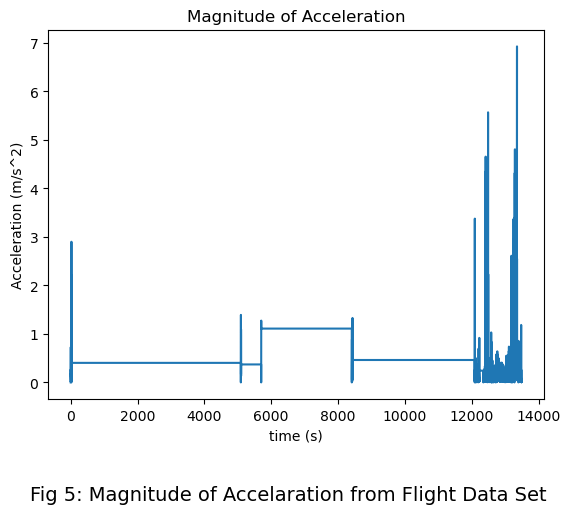

In [41]:
a_mag = np.sqrt(df2["ax"].values**2+df2["az"].values**2+df2["ay"].values**2)
plt.title("Magnitude of Acceleration")
plt.plot(df2["time"].values, a_mag)
plt.xlabel("time (s)")
plt.ylabel("Acceleration (m/s^2)")
getCaption(5, r"Magnitude of Accelaration from Flight Data Set")
plt.show()

Using this data set to estimate the value of $g$

In [45]:
x = df2.ax.values
y = df2.ay.values
z = df2.az.values

sample_rate = round(len(df2.index) / df2.time.values[-1])
cutoff_frequency = 0.1 
signal_lenght = len(df.index)

In [46]:
A_DCx, diff_x = getFilteredData(x, cutoff_frequency, sample_rate)
A_DCy, diff_y = getFilteredData(y, cutoff_frequency, sample_rate)
A_DCz, diff_z = getFilteredData(z, cutoff_frequency, sample_rate)

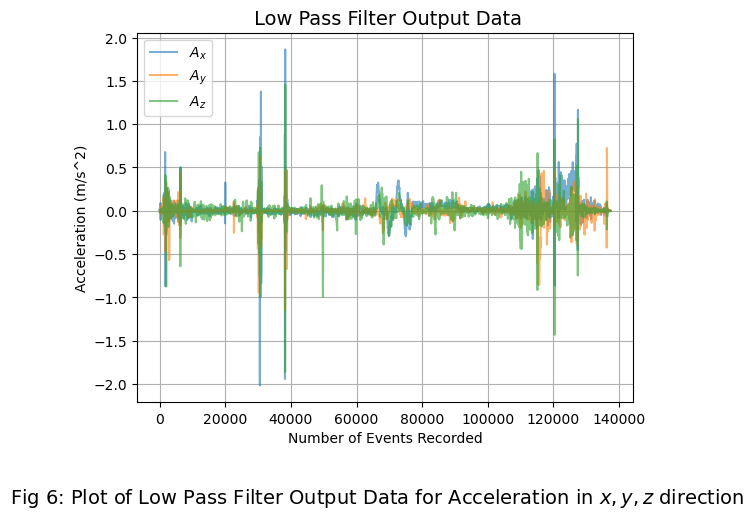

In [50]:
plt.plot(A_DCx, label=r"$A_x$", alpha=0.6)
plt.plot(A_DCy, label=r"$A_y$", alpha=0.6)
plt.plot(A_DCz, label=r"$A_z$", alpha=0.6)
plt.title(" Low Pass Filter Output Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Number of Events Recorded")
plt.grid()
plt.legend()
getCaption(6, r"Plot of Low Pass Filter Output Data for Acceleration in $x,y,z$ direction")
plt.show()

In [51]:
A_g = np.sqrt(A_DCx**2+A_DCy**2+A_DCz**2)
g = sum(A_g)/len(A_g)
g

0.10478987781472546

Again, we miscalculate the value of $g$. As a sanity check we use the GForce Data Sensor to estimate the value of $g$.

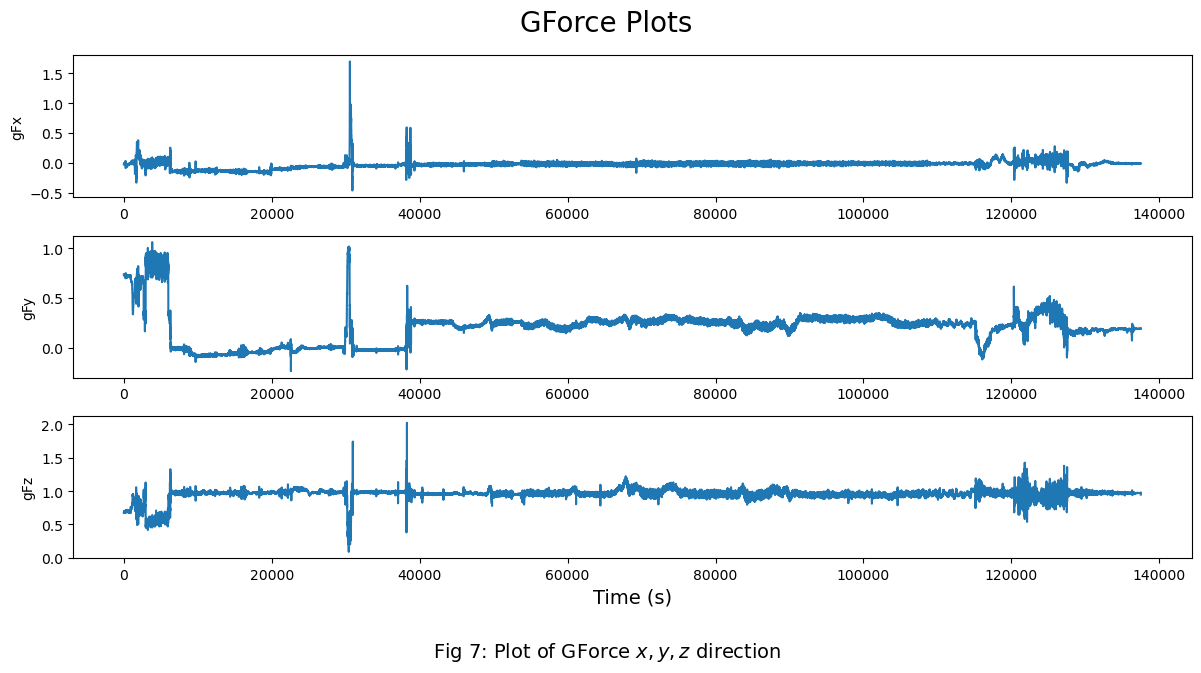

In [65]:
fig, axes = plt.subplots(nrows=3,ncols=1,figsize=(12,6))
plt.suptitle("GForce Plots", fontsize=20)

a1 = df2.gFx.plot(ax = axes[0],subplots=True) 
a1[0].set_ylabel("gFx")

a2 = df2.gFy.plot(ax = axes[1],subplots=True)
a2[0].set_ylabel("gFy")


a3 = df2.gFz.plot(ax = axes[2],subplots=True)
a3[0].set_ylabel("gFz")

fig.tight_layout()
plt.xlabel("Time (s)",fontsize=14)
getCaption(7, r"Plot of GForce $x,y,z$ direction")
plt.show()

In [54]:
g_gforce = np.sqrt(df2.gFx.values**2+df2.gFy.values**2+df2.gFz.values**2)
g_est = (sum(g_gforce)/len(g_gforce))*9.81
g_est

9.765305419677741

As evident, the sensor is clearly detecting the gravitational acceleration ($g \sim 9.77 m/s^2$). We are now looking more into the app to see how it functions.

At the $11^{th}$ hour, we realized that the app we have been using **already filters the accelerometer data** by isolating the effects of gravity - the same task we wanted to undertake. Now, we have decided to move to a different app to record the raw acceleration data since there was no options to stop the app from filtering the data.

We are choosing **MATLAB**'s mobile app to work as the sensor since it does not autofilter.

---

## 10 Hour Data Set From Mohammad's Home Activities

We have recorded a 10 hour data run using the new app. Mohammad acquired all this data while doing his every day activities at home.

In [122]:
df3 = pd.read_csv("sensorlog_accel_20210214_151702.csv")
df3_orient = pd.read_csv("sensorlog_orient_20210214_151702.csv")
df3_orient.columns = ["timestamp","wX","wY","wZ"]
df3.timestamp = (df3.timestamp - df3.timestamp[0]) / 1000 #converting to seconds
df3_orient.timestamp = (df3_orient.timestamp - df3_orient.timestamp[0]) / 1000 #converting to seconds
df3

,timestamp,X,Y,Z
0,0.000,0.216850,0.030808,9.649057
1,0.100,0.230608,0.029910,9.652946
2,0.200,0.237488,0.010469,9.652946
3,0.300,0.215354,0.019442,9.649955
4,0.400,0.204586,0.019143,9.648160
...,...,...,...,...
298402,36090.907,0.089133,0.173779,9.682557
298403,36091.007,0.083749,0.171685,9.685847
298404,36091.107,0.080459,0.177667,9.682557
298405,36091.207,0.085843,0.171685,9.685847


In [123]:
time = df3.timestamp.values[-1] - df3.timestamp.values[0] 

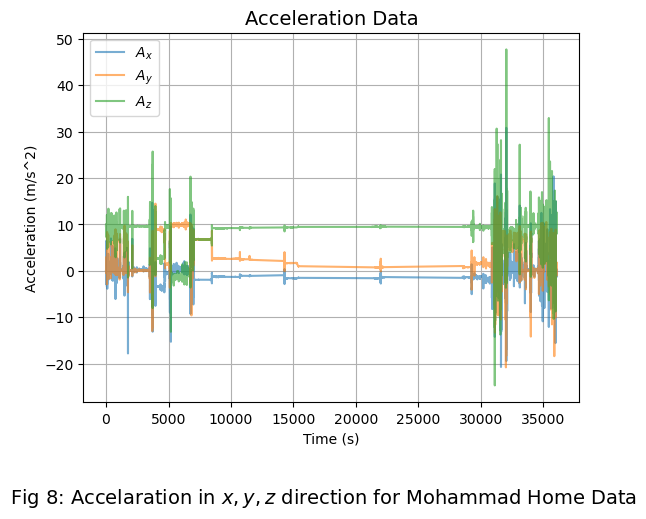

In [67]:
plt.plot(df3.timestamp.values, df3.X.values, label=r"$A_x$", alpha=0.6)
plt.plot(df3.timestamp.values, df3.Y.values, label=r"$A_y$", alpha=0.6)
plt.plot(df3.timestamp.values, df3.Z.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()
getCaption(8, r"Accelaration in $x,y,z$ direction for Mohammad Home Data")
plt.show()

Now, trying to calculate the $g$ value from this data set using the same routine as before.

In [125]:
x = df3.X.values
y = df3.Y.values
z = df3.Z.values

sample_rate = 10 #Hz
cutoff_frequency = 0.1 
signal_lenght = len(df3.index)

A_DCx, diff_x = getFilteredData(x, cutoff_frequency, sample_rate)
A_DCy, diff_y = getFilteredData(y, cutoff_frequency, sample_rate)
A_DCz, diff_z = getFilteredData(z, cutoff_frequency, sample_rate)

In [126]:
A_g = np.sqrt(A_DCx**2+A_DCy**2+A_DCz**2)
g = sum(A_g)/len(A_g)
g

9.711021311356017

In [127]:
error = 100*((9.81-g)/g)
error

1.0192407726285004

Beautiful! As we can see our filtering algorithm is almost near spot on (within $1\%$ error). This is really promising since Mohammad did not keep his device oriented in a particular axis throughout the duration of the experiment which introduces inconsistencies in the Acceleration data. However, taking the Euclidean Norm in 3 dimensions may have mitigated the error's impact on our final result.

We can try and calibrate this data even further by filtering out the effects of Mohammad rotating his phone. For this, we can use the gyroscope in his device.

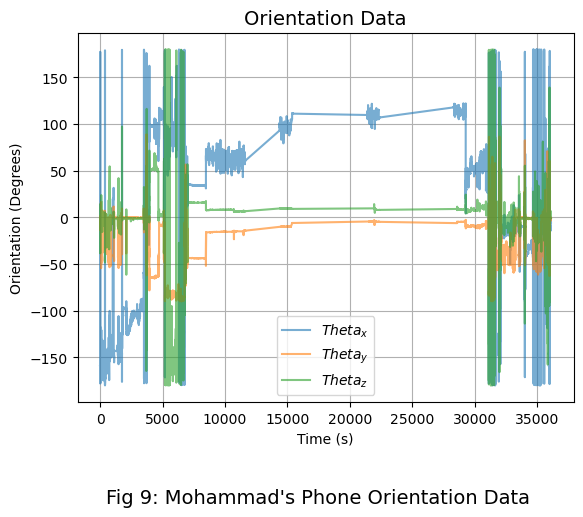

In [106]:
plt.plot(df3_orient.timestamp.values, df3_orient.wX.values, label=r"$Theta_x$", alpha=0.6)
plt.plot(df3_orient.timestamp.values, df3_orient.wY.values, label=r"$Theta_y$", alpha=0.6)
plt.plot(df3_orient.timestamp.values, df3_orient.wZ.values, label=r"$Theta_z$", alpha=0.6)
plt.title("Orientation Data",fontsize=14)
plt.ylabel("Orientation (Degrees)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()
getCaption(9, r"Mohammad's Phone Orientation Data")
plt.show()

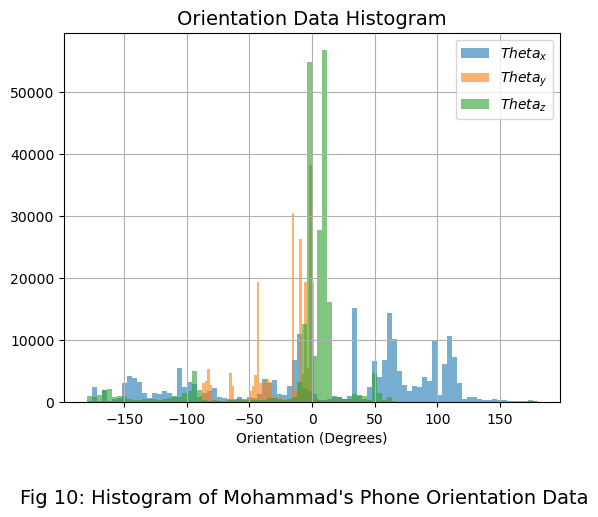

In [109]:
plt.hist(df3_orient.wX.values, label=r"$Theta_x$", alpha=0.6, bins=90)
plt.hist(df3_orient.wY.values, label=r"$Theta_y$", alpha=0.6, bins=90)
plt.hist(df3_orient.wZ.values, label=r"$Theta_z$", alpha=0.6, bins=90)
plt.title("Orientation Data Histogram",fontsize=14)
plt.xlabel("Orientation (Degrees)")
#plt.xlabel("Time (s)")
plt.grid()
plt.legend()
getCaption(10, r"Histogram of Mohammad's Phone Orientation Data")
plt.show()

Keeping events that are within $\pm5$ degrees orientation to $0$ degrees.

In [133]:
angle = 5
filtered_df3 = df3_orient[(df3_orient['wX'] >= -angle) & (df3_orient['wX'] <= angle)]
filtered_df3 = df3_orient[(df3_orient['wY'] >= -angle) & (df3_orient['wY'] <= angle)]
filtered_df3 = df3_orient[(df3_orient['wZ'] >= -angle) & (df3_orient['wZ'] <= angle)]
indices = filtered_df3.index.values

array([     0,      1,      2, ..., 228055, 228056, 228057])

In [142]:
filtered_df3 = df3.iloc[indices,:]

x = filtered_df3.X.values
y = filtered_df3.Y.values
z = filtered_df3.Z.values

sample_rate = 10 #Hz
cutoff_frequency = 0.1 
signal_lenght = len(df.index)

A_DCx, diff_x = getFilteredData(x, cutoff_frequency, sample_rate)
A_DCy, diff_y = getFilteredData(y, cutoff_frequency, sample_rate)
A_DCz, diff_z = getFilteredData(z, cutoff_frequency, sample_rate)

A_g = np.sqrt(A_DCx**2+A_DCy**2+A_DCz**2)
g = sum(A_g)/len(A_g)
g

9.793524211722861

In [141]:
error = 100*((9.81-g)/g)
error

0.16823145499980302

In [144]:
factor = 1.02 // error
factor

6.0

As expected the calibration helped reduce the overall error from $1.02 \%$ to $0.168\%$ an improvement factor of almost $600 \%$.

---

# Experiment 2: Fourier Analysis of Human Motion Data


## Methodology

<span style="color:blue">
Plan:
    
- explain experimental set up
- explain DAQ
- explain test
</span>

In [64]:
def analyzeData(time,val,df,sname, samplingFrequency, title,lims=[None,None]):
    #import data
    data = df

    #extract information
    df_close = data[val]
    prices = df_close.to_numpy()

    #Fourier Transform
    amplitude = prices
    days = data[val].values
    samplingInterval = 1 / samplingFrequency

    fourierTransform = np.fft.fft(amplitude)/len(amplitude)           
    fourierTransform = fourierTransform[range(int(len(amplitude)/2))] 
    tpCount     = len(amplitude)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod

   # showPlot()

    plt.plot(frequencies, abs(fourierTransform))
    plt.title('Fourier transform depicting the frequency components ({})'.format(title),fontsize=14)
    plt.xlabel("Frequency",fontsize=13)
    plt.ylabel(sname + val)
    plt.xlim(lims[0])
    plt.ylim(lims[1])
    plt.show()

In [65]:
def getFT(time, val ,df, samplingFrequency):
    data = df
    df_close = data[val]
    prices = df_close.to_numpy()
    #Fourier Transform
    amplitude = prices
    days = data[val].values
    samplingInterval = 1 / samplingFrequency

    fourierTransform = np.fft.fft(amplitude)/len(amplitude)           
    fourierTransform = fourierTransform[range(int(len(amplitude)/2))] 
    tpCount     = len(amplitude)
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/samplingFrequency
    frequencies = values/timePeriod
    return frequencies, fourierTransform

def getFTofA(time,vals,df, sname, samplingFrequency, title,fig_num,lims=[None,None]):
    xval, yval, zval = vals
    xf, xfT = getFT(time, xval ,df, samplingFrequency)
    yf, yfT = getFT(time, yval ,df, samplingFrequency)
    zf, zfT = getFT(time, zval ,df, samplingFrequency)
    
    fig = plt.figure(figsize=(14, 10))
    gs = fig.add_gridspec(3, hspace=0.1)
    axs = gs.subplots(sharex=True)
    fig.suptitle('Fourier transform depicting the frequency components ({})'.format(title),fontsize=15)
    axs[0].plot(xf, abs(xfT))
    axs[0].set_ylabel(sname + xval,fontsize=13)
    axs[0].set_xlim(lims[0])
    axs[0].set_ylim(lims[1])
    axs[1].plot(yf, abs(yfT))
    axs[1].set_ylabel(sname + yval,fontsize=13)
    axs[1].set_xlim(lims[0])
    axs[1].set_ylim(lims[1])
    axs[2].plot(zf, abs(zfT))
    axs[2].set_ylabel(sname + zval,fontsize=13)
    axs[2].set_xlim(lims[0])
    axs[2].set_ylim(lims[1])
    plt.xlabel("Frequency",fontsize=14) 
    sep=0.01
    cap = r"Fourier Transform of Accelerometer Data in $x,y,z$ direction"
    txt="Fig {}: {}".format(fig_num, cap)
    plt.figtext(0.5, sep, txt, wrap=True, horizontalalignment='center', fontsize=14)
   # fig.tight_layout()
    plt.show()

In [66]:
def getFTofAwithActivities(time,xval,df,activities, sname, samplingFrequency, title, fig_num, lims=[None,None]):
    a1, a2, a3, a4, a5, a6 = activities
    df1 = df[df["activity"]==a1]
    df2 = df[df["activity"]==a2]
    df3 = df[df["activity"]==a3]
    df4 = df[df["activity"]==a4]
    df5 = df[df["activity"]==a5]
    df6 = df[df["activity"]==a6]
    xf1, xf1T = getFT(time, xval ,df1, samplingFrequency)
    xf2, xf2T = getFT(time, xval ,df2, samplingFrequency)
    xf3, xf3T = getFT(time, xval ,df3, samplingFrequency)
    xf4, xf4T = getFT(time, xval ,df4, samplingFrequency)
    xf5, xf5T = getFT(time, xval ,df5, samplingFrequency)
    xf6, xf6T = getFT(time, xval ,df6, samplingFrequency)
    
    fig = plt.figure(figsize=(14, 10))
    plt.title('Fourier transform depicting the frequency components ({})'.format(title),fontsize=15)
    plt.plot(xf1, abs(xf1T), label=a1)
    plt.plot(xf2, abs(xf2T), label=a2)
    plt.plot(xf3, abs(xf3T), label=a3)
    plt.plot(xf4, abs(xf4T), label=a4)
    plt.plot(xf5, abs(xf5T), label=a5)
    plt.plot(xf6, abs(xf6T), label=a6)
    plt.ylabel(sname + xval,fontsize=13)
    plt.xlim(lims[0])
    plt.ylim(lims[1])
    plt.xlabel("Frequency",fontsize=14) 
    plt.legend()
    sep=0.01
    cap = r"Fourier Transform of Accelerometer Data in {} direction".format(xval)
    txt="Fig {}: {}".format(fig_num, cap)
    plt.figtext(0.5, sep, txt, wrap=True, horizontalalignment='center', fontsize=14)
    plt.show()

## 1 Hour of Activity Data from Sam

<span style="color:red">
    
Plan:

- exp set up
 
</span>

In [153]:
sdf1 = pd.read_csv("sam_exp2_acc_1.csv")
sdf1.columns = ["time","ax","ay","az"]
sdf2 = pd.read_csv("sam_exp2_acc_2.csv")
sdf2.columns = ["time","ax","ay","az"]
sdf2.time = sdf2.time.values + sdf1.time.values[-1]
sdf = pd.concat([sdf1, sdf2], ignore_index=True)
sdf

,time,ax,ay,az
0,0.000000,-0.079784,9.879006,-0.205972
1,0.100796,-0.066911,9.868379,-0.197888
2,0.201627,-0.063318,9.870923,-0.185913
3,0.302457,-0.071851,9.867331,-0.181423
4,0.403287,-0.068557,9.873019,-0.189805
...,...,...,...,...
71312,7174.506640,-0.713267,9.544003,1.810784
71313,7174.605486,-1.122665,9.800869,1.688489
71314,7174.704333,-0.678090,9.676927,1.494941
71315,7174.803179,-0.998124,9.653126,1.634601


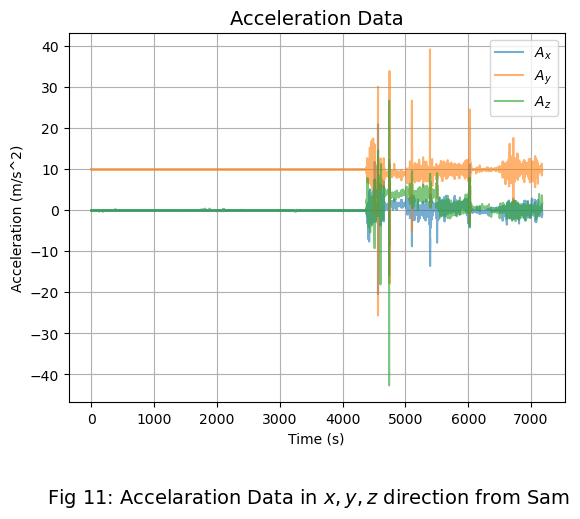

In [155]:
plt.plot(sdf.time.values, sdf.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(sdf.time.values, sdf.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(sdf.time.values, sdf.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()
getCaption(11, r"Accelaration Data in $x,y,z$ direction from Sam")
plt.show()

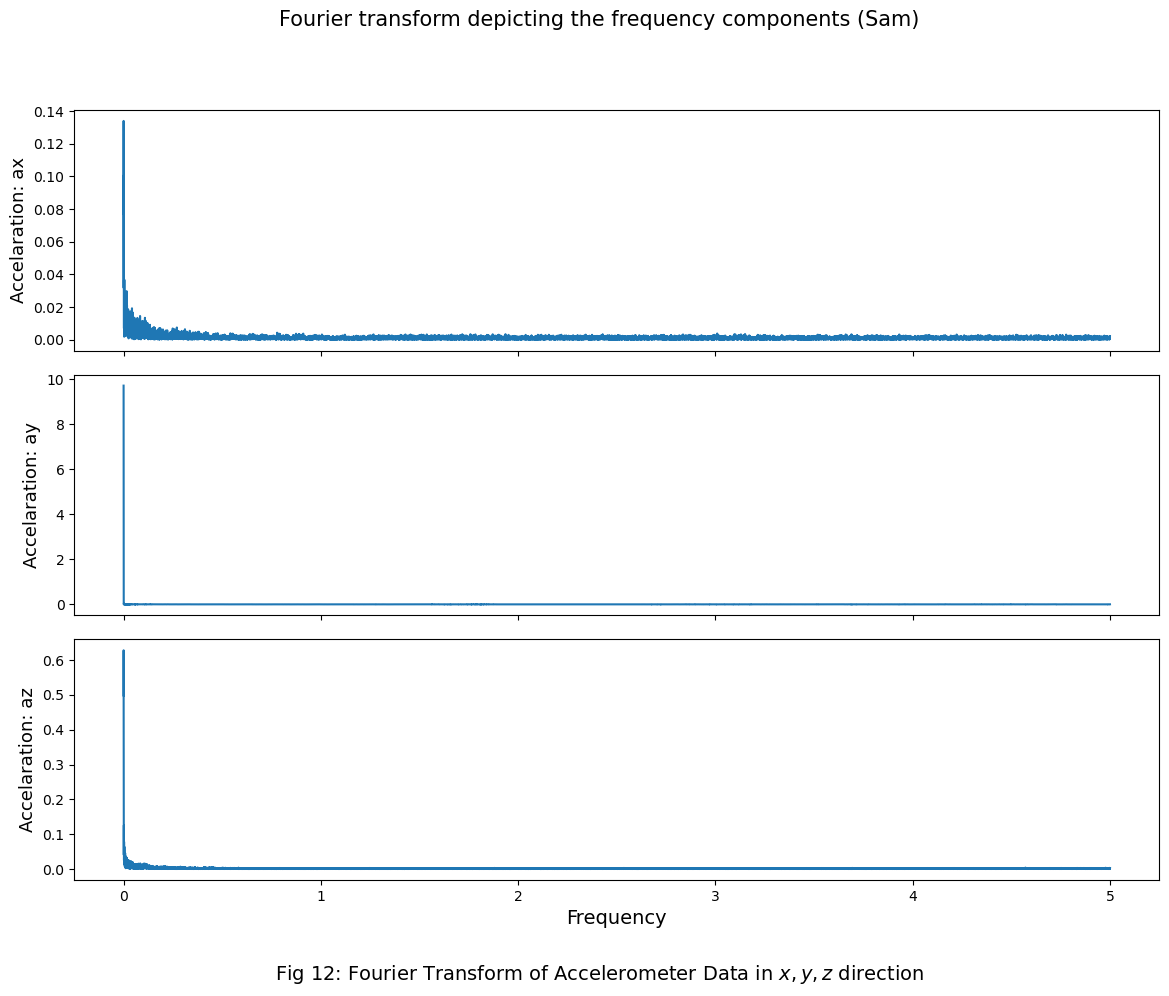

In [156]:
getFTofA("time",["ax","ay","az"], sdf,"Accelaration: ", 10, "Sam", 12)

### Sam Driving Data Analysis

In [157]:
sddf = sdf[sdf.time > 5000]
sddf

,time,ax,ay,az
49576,5000.025919,1.403781,8.591983,4.404441
49577,5000.126806,1.540596,8.690328,4.467759
49578,5000.227727,1.622326,8.777447,4.234544
49579,5000.328649,1.503474,8.670569,4.291127
49580,5000.429571,1.337020,8.638536,4.387376
...,...,...,...,...
71312,7174.506640,-0.713267,9.544003,1.810784
71313,7174.605486,-1.122665,9.800869,1.688489
71314,7174.704333,-0.678090,9.676927,1.494941
71315,7174.803179,-0.998124,9.653126,1.634601


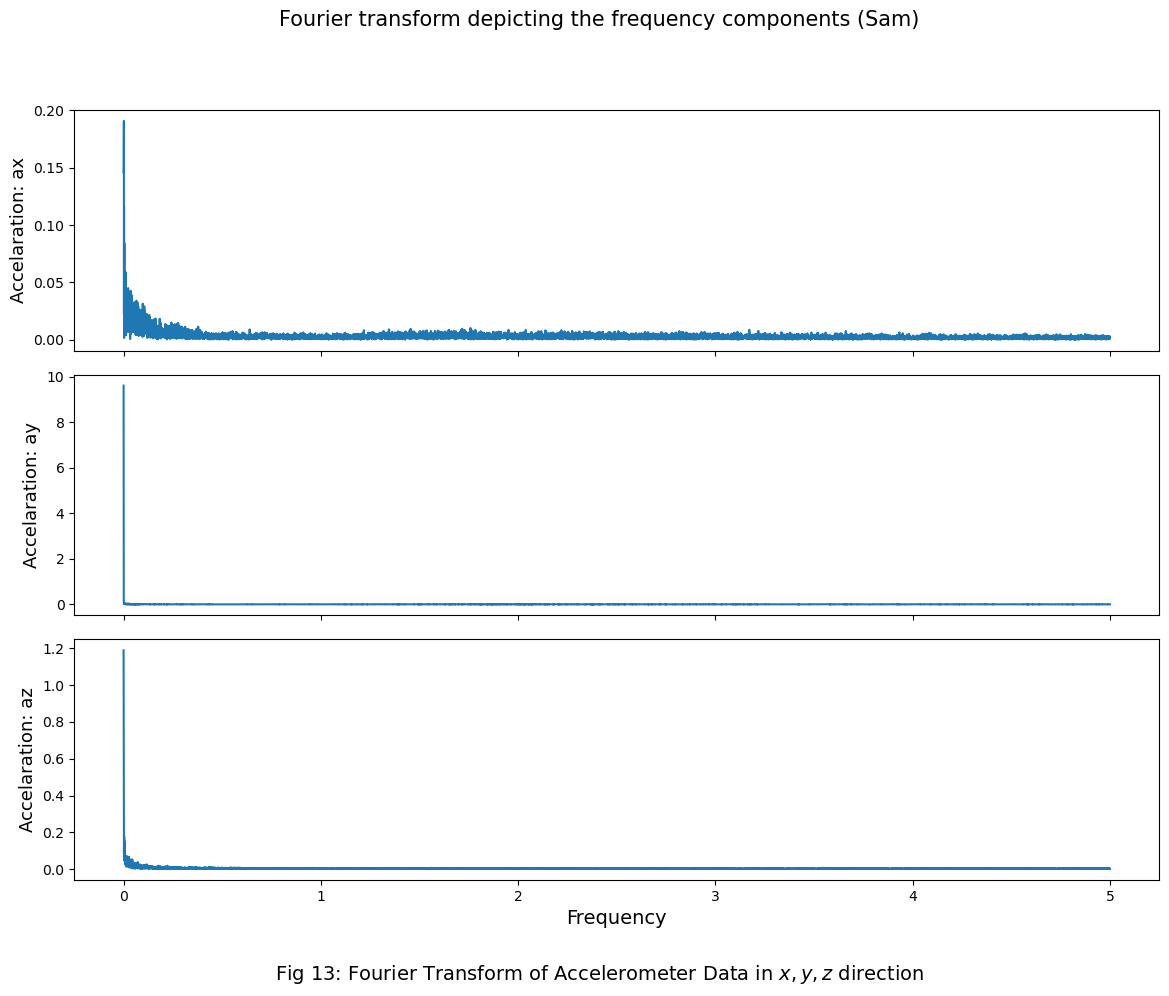

In [158]:
getFTofA("time",["ax","ay","az"], sddf,"Accelaration: ", 10, "Sam",13)

## 1 Hour of Activity Data from Mohammad

<span style="color:red">
    
Plan:

- exp set up
 
</span>

In [159]:
mdf = pd.read_csv("sensorlog_accel_exp_2.csv")
mdf.columns = ["time","ax","ay","az"]
mdf

,time,ax,ay,az
0,1613500494641,0.190828,9.652946,2.177469
1,1613500494741,0.364905,9.633504,2.354238
2,1613500494841,0.637687,9.564411,2.561816
3,1613500494941,0.597907,9.772287,2.530410
4,1613500495041,0.703191,9.596416,2.541477
...,...,...,...,...
3028,1613500756538,-0.030808,2.179562,9.658031
3029,1613500756638,0.348455,2.508875,9.102596
3030,1613500756738,0.249452,2.540280,9.650852
3031,1613500756838,0.312562,2.656631,9.282657


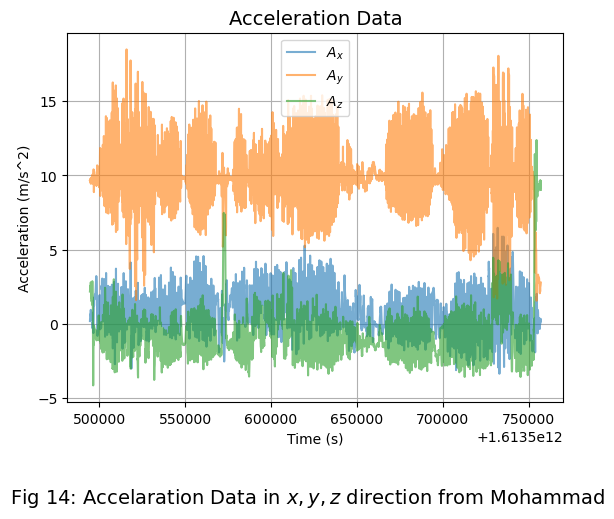

In [160]:
plt.plot(mdf.time.values, mdf.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(mdf.time.values, mdf.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(mdf.time.values, mdf.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (s)")
plt.grid()
plt.legend()
getCaption(14, r"Accelaration Data in $x,y,z$ direction from Mohammad")
plt.show()

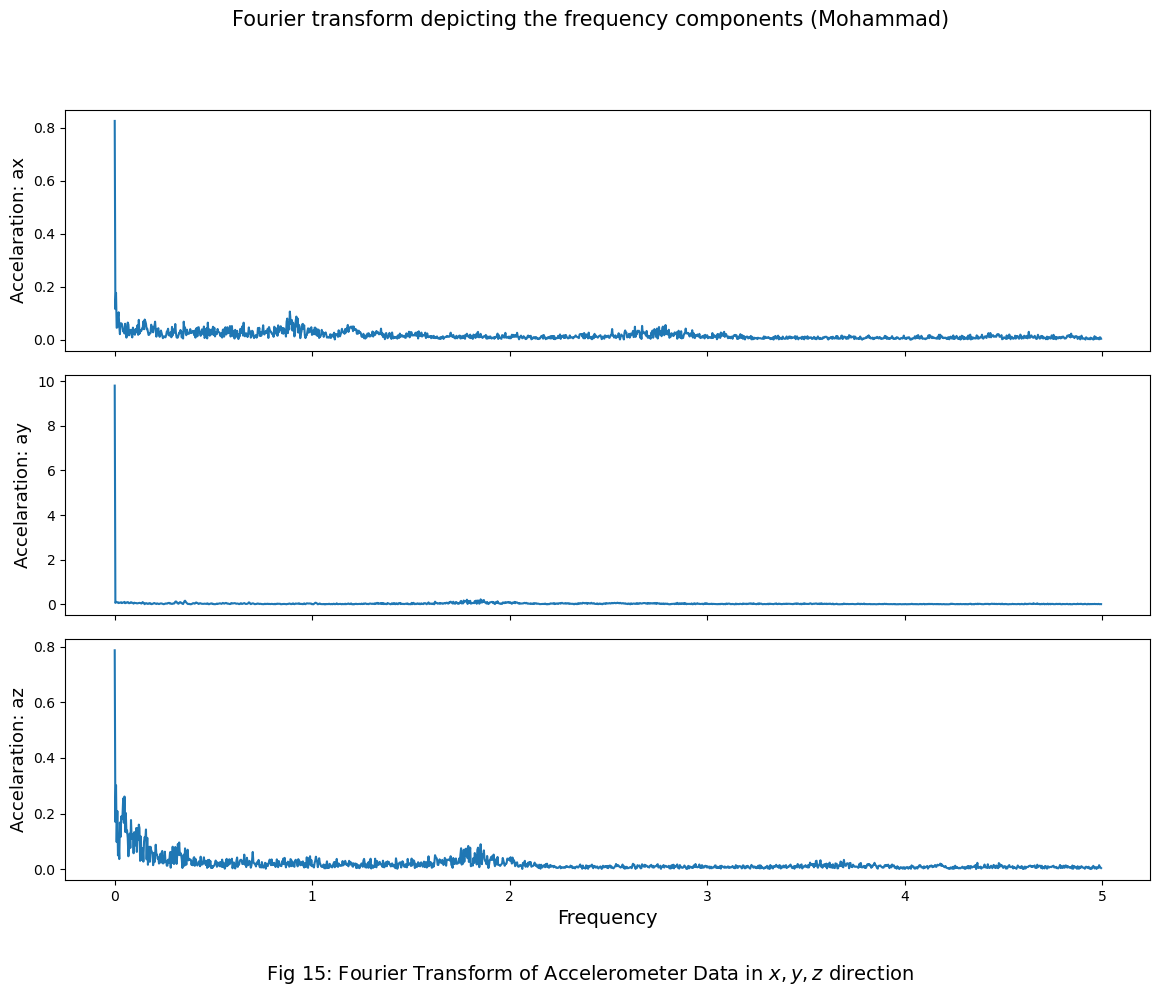

In [161]:
getFTofA("time",["ax","ay","az"], mdf,"Accelaration: ", 10, "Mohammad",15)

Since, the data sets were quite rough. We planned on taking another data run where Mohammad and Sam would be doing similar activities - *walking*,*jogging/running*,*chores*, *sitting*, and *laying*.

## Raw Data Set From Sam

Sam recored data in the following order in $5$ minute blocks.

- jogging (2.46m/s)
- walking
- stairmaster(45 spm)
- chores
- sitting
- lay


In [1]:
activities = ["jog","walk","stairs","chores","sit","lay"]

def tagActvities(rep_num):
    global activities
    act = []
    for j in range(len(activities)):
        i = 0
        while i != rep_num:
            act.append(activities[j])
            i +=1
    return act

In [163]:
sdf1 = pd.read_csv("exp2_data/Accelerometer_a.csv")
sdf1.columns = ["time","ax","ay","az"]
sdf2 = pd.read_csv("exp2_data/Accelerometer_b.csv")
sdf2.columns = ["time","ax","ay","az"]
sdf2.time = sdf2.time.values + sdf1.time.values[-1]
sdf = pd.concat([sdf1, sdf2], ignore_index=True)
sdf = sdf.iloc[:-5] # multiple of 6
sdf["activity"] = tagActvities(len(sdf.index)/6)
sdf

,time,ax,ay,az,activity
0,0.000000,-4.558770,13.991255,10.623259,jog
1,0.100952,-2.477199,12.424763,5.951324,jog
2,0.201873,0.396675,5.089117,3.673960,jog
3,0.302825,0.997975,2.584076,2.921026,jog
4,0.403747,-0.380359,18.807041,14.124328,jog
...,...,...,...,...,...
19459,1961.061473,-0.077389,-0.029788,9.814191,lay
19460,1961.162395,-0.059576,-0.024848,9.806258,lay
19461,1961.263286,-0.073647,-0.028441,9.772278,lay
19462,1961.364208,-0.086819,-0.016466,9.802216,lay


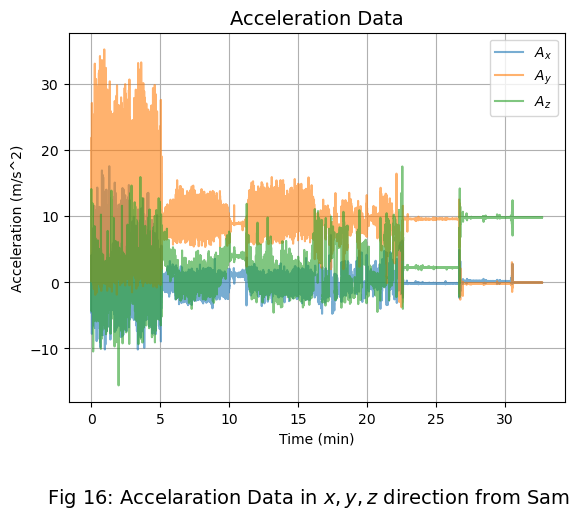

In [164]:
plt.plot(sdf.time.values/60, sdf.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(sdf.time.values/60, sdf.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(sdf.time.values/60, sdf.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (min)")
plt.grid()
plt.legend()
getCaption(16, r"Accelaration Data in $x,y,z$ direction from Sam")
plt.show()

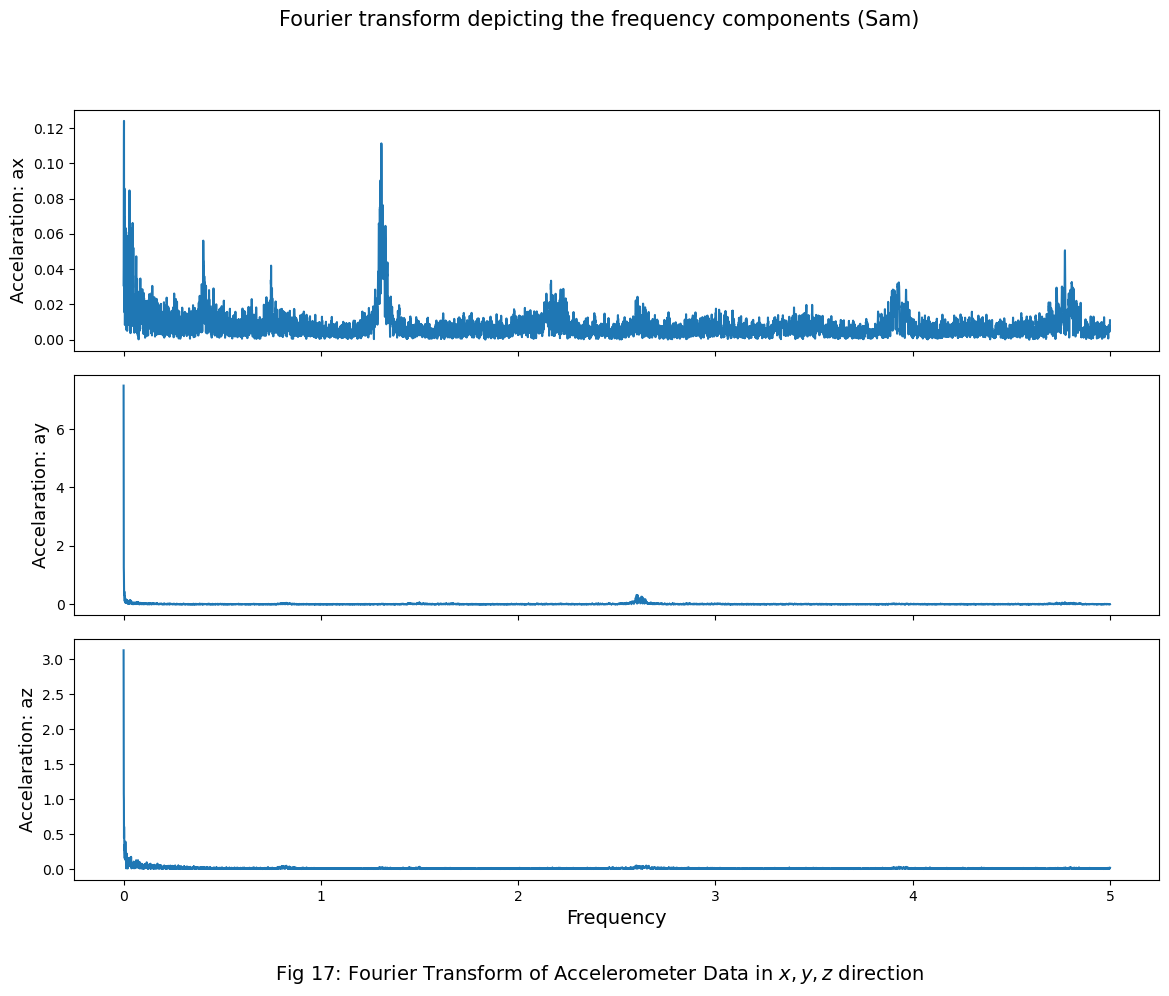

In [165]:
getFTofA("time",["ax","ay","az"], sdf,"Accelaration: ", 10, "Sam",17)

### Looking at the power spectrum for particular activities


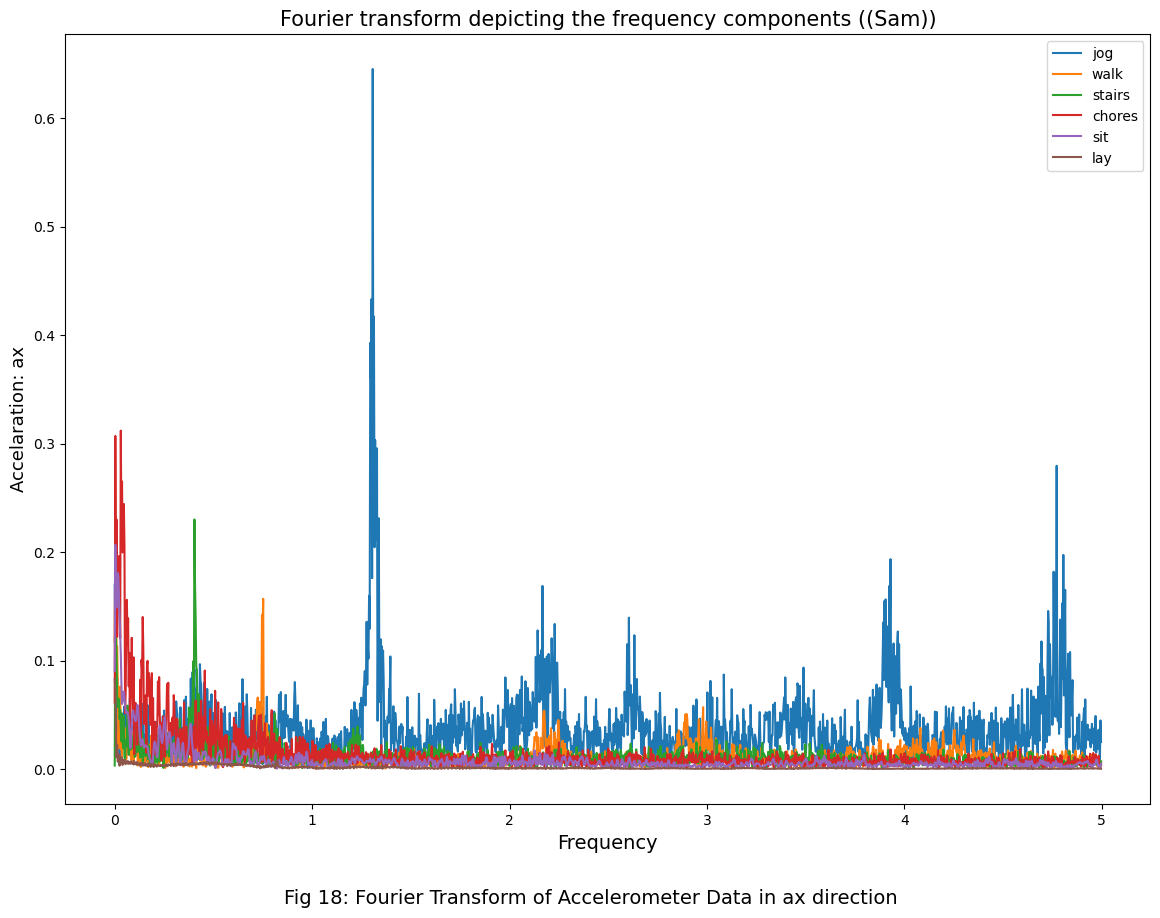

In [166]:
getFTofAwithActivities("time","ax", sdf, activities,"Accelaration: ", 10, "(Sam)",18)

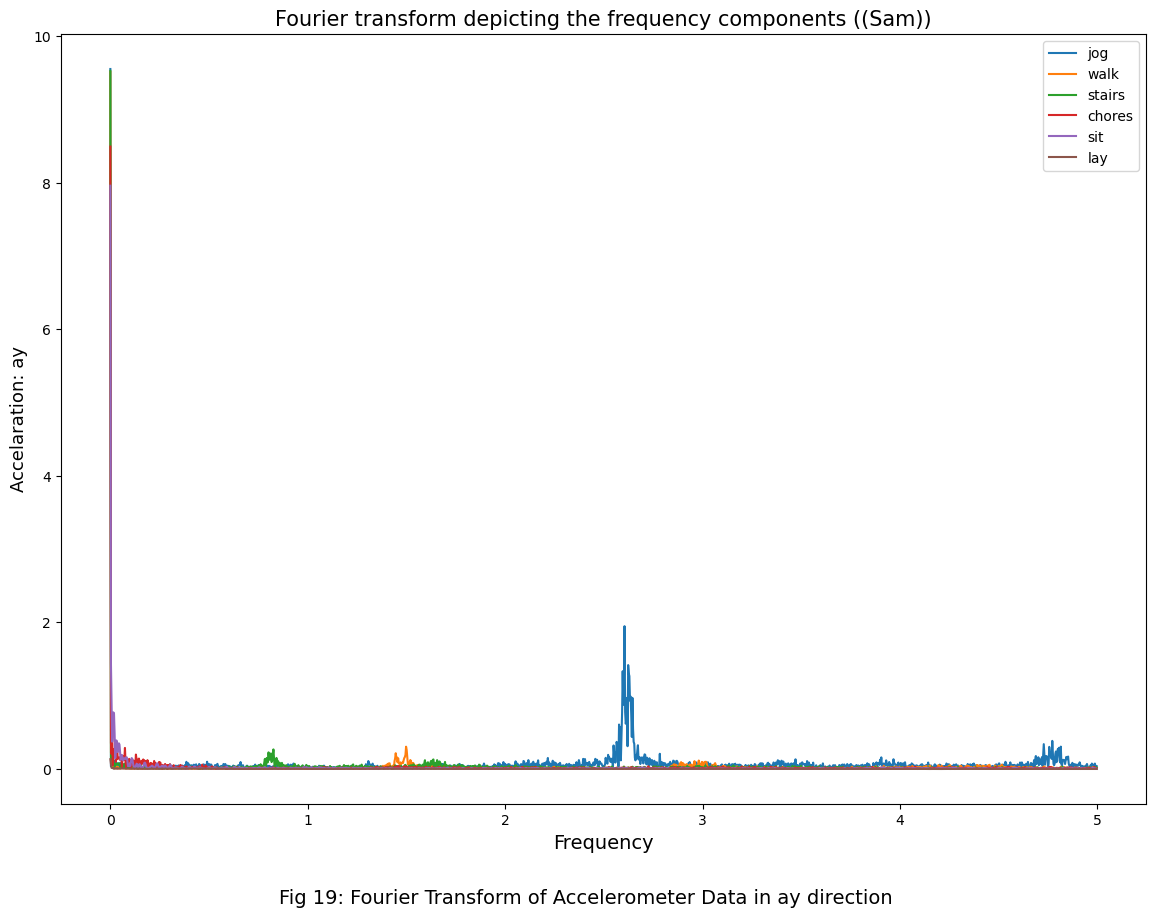

In [167]:
getFTofAwithActivities("time","ay", sdf, activities,"Accelaration: ", 10, "(Sam)",19)

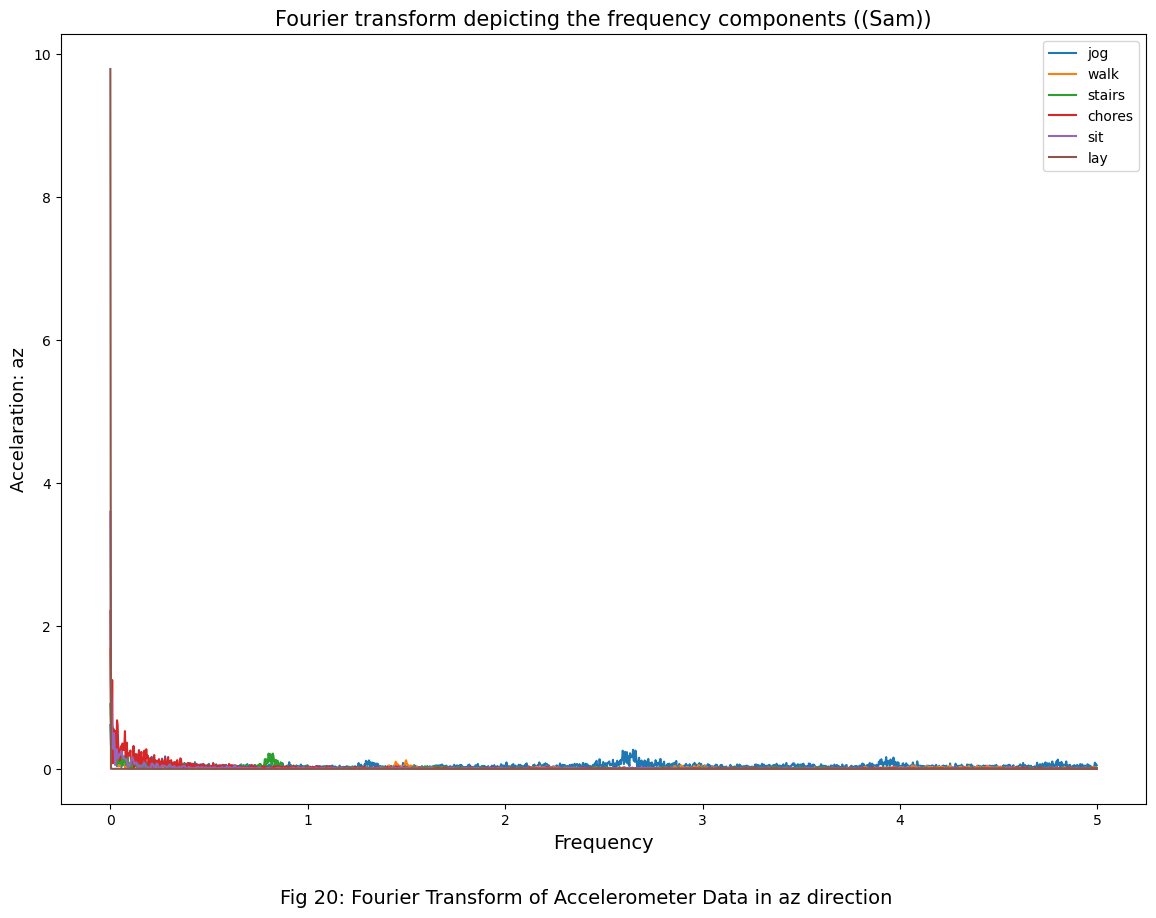

In [168]:
getFTofAwithActivities("time","az", sdf, activities,"Accelaration: ", 10, "(Sam)",20)

Redoing the analysis after filtering the gravitational data.

### Dynamic Body Data Analysis

In [175]:
x = sdf.ax.values
y = sdf.ay.values
z = sdf.az.values

sample_rate = 10
cutoff_frequency = 0.1 
signal_lenght = len(sdf.index)

A_DCx, diff_x = getFilteredData(x, cutoff_frequency, sample_rate)
A_DCy, diff_y = getFilteredData(y, cutoff_frequency, sample_rate)
A_DCz, diff_z = getFilteredData(z, cutoff_frequency, sample_rate)

In [176]:
sdf_d = pd.DataFrame()
sdf_d["time"] = sdf.time.values
sdf_d["ax"] = diff_x
sdf_d["ay"] = diff_y
sdf_d["az"] = diff_z
sdf_d["activity"] = tagActvities(len(sdf_d.index)/6)
sdf_d

,time,ax,ay,az,activity
0,0.000000,-0.560618,0.944762,-0.897444,jog
1,0.100952,1.412253,-0.529077,-5.084101,jog
2,0.201873,4.176222,-7.770004,-6.879832,jog
3,0.302825,4.666611,-10.178475,-7.155530,jog
4,0.403747,3.176563,6.142691,4.519876,jog
...,...,...,...,...,...
19459,1961.061473,-0.004785,-0.008632,0.018720,lay
19460,1961.162395,0.013029,-0.003691,0.010783,lay
19461,1961.263286,-0.001041,-0.007283,-0.023199,lay
19462,1961.364208,-0.014212,0.004693,0.006736,lay


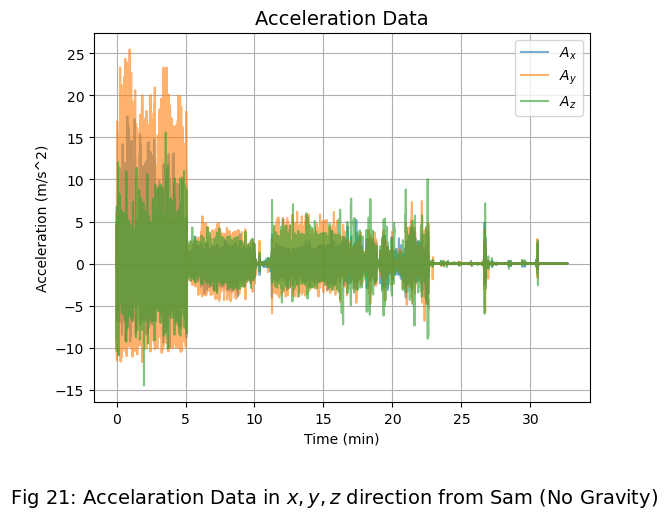

In [172]:
plt.plot(sdf_d.time.values/60, sdf_d.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(sdf_d.time.values/60, sdf_d.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(sdf_d.time.values/60, sdf_d.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (min)")
plt.grid()
plt.legend()
getCaption(21, r"Accelaration Data in $x,y,z$ direction from Sam (No Gravity)")
plt.show()

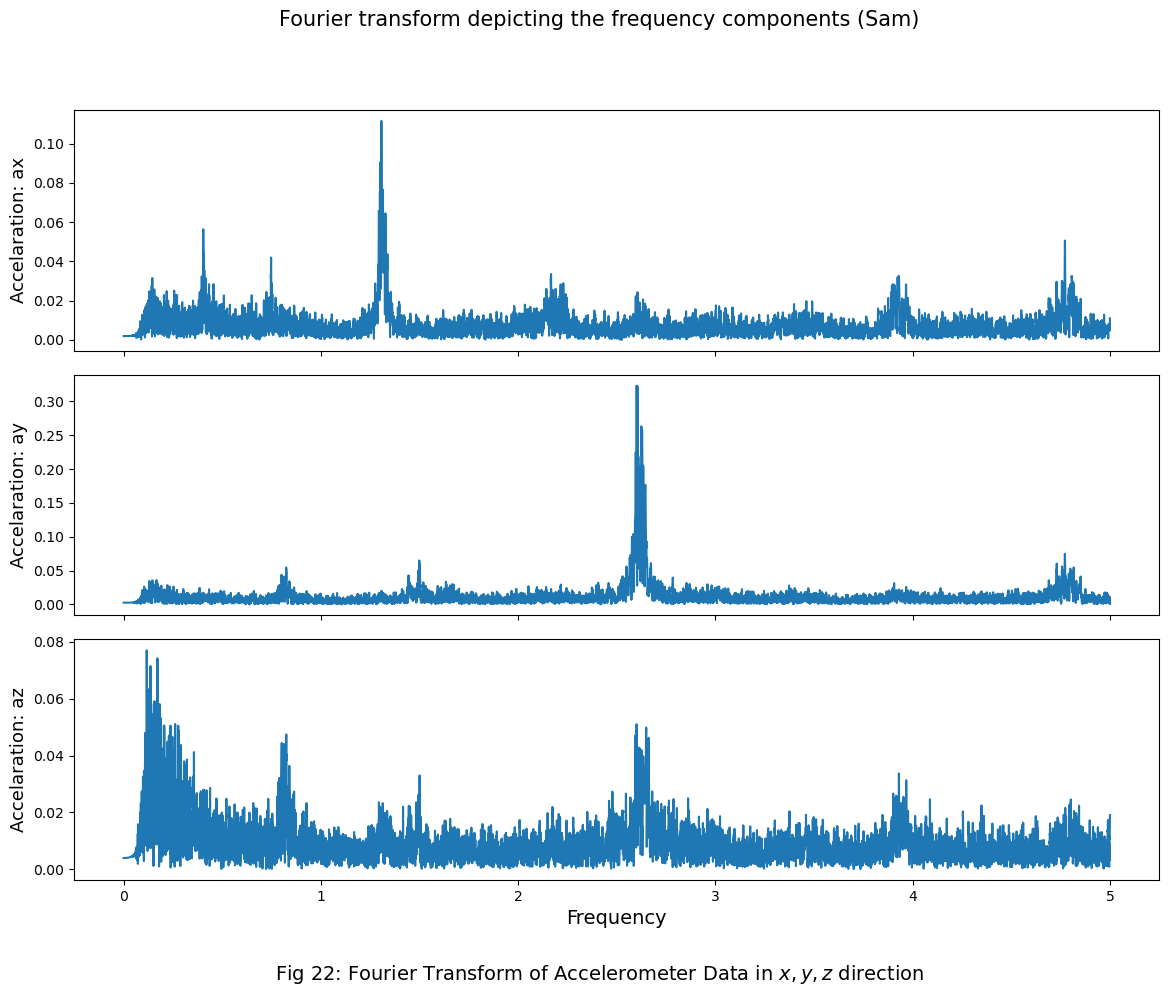

In [177]:
getFTofA("time",["ax","ay","az"], sdf_d,"Accelaration: ", 10, "Sam",22)

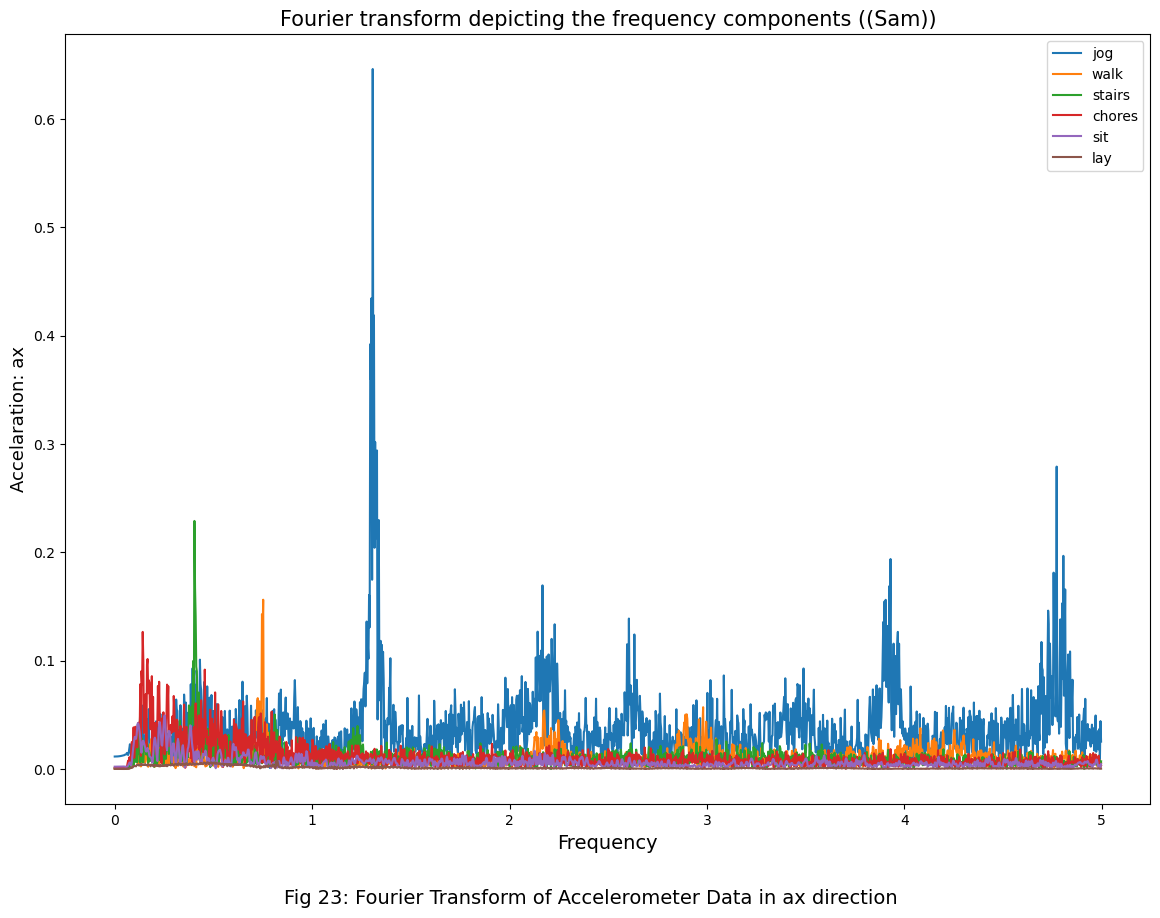

In [178]:
getFTofAwithActivities("time","ax", sdf_d, activities,"Accelaration: ", 10, "(Sam)",23)

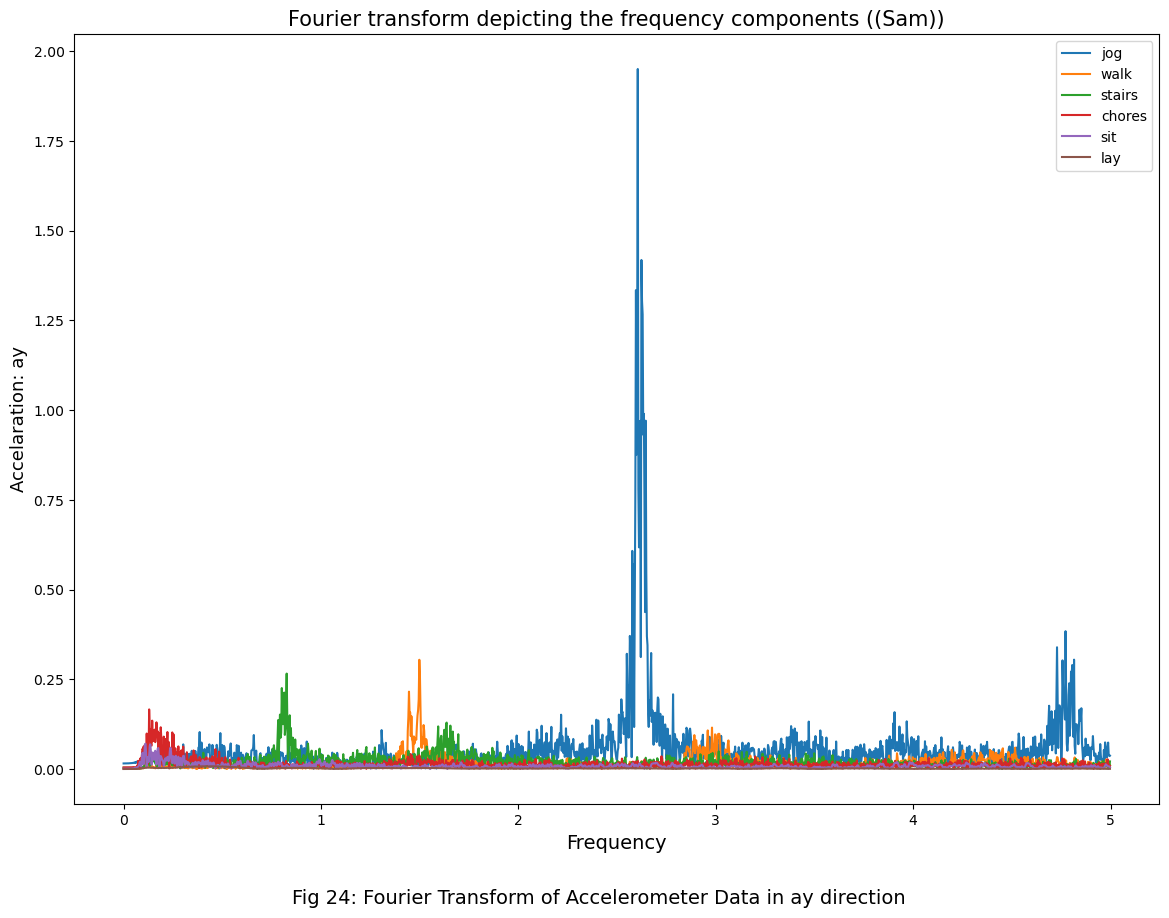

In [179]:
getFTofAwithActivities("time","ay", sdf_d, activities,"Accelaration: ", 10, "(Sam)",24)

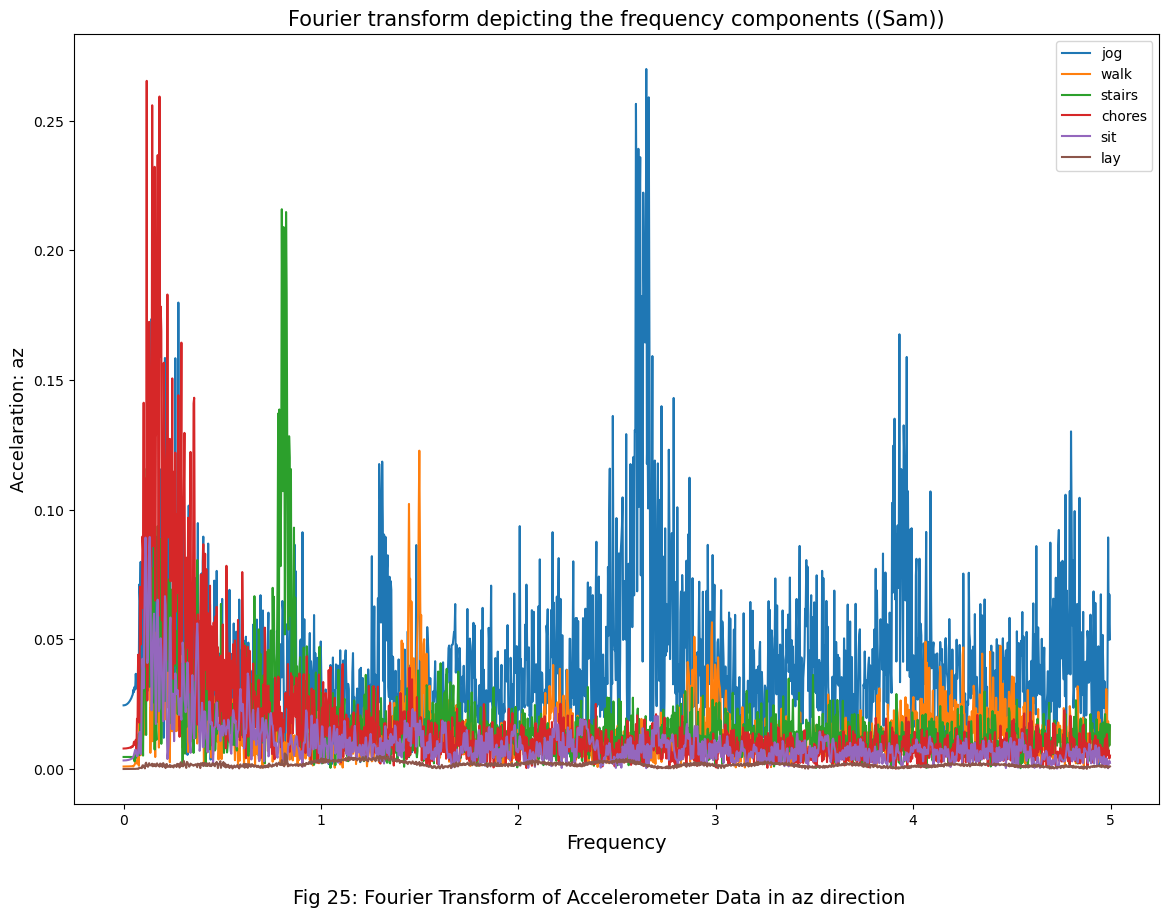

In [180]:
getFTofAwithActivities("time","az", sdf_d, activities,"Accelaration: ", 10, "(Sam)",25)

## Data Set from Mohammad

Mohammad took data in the following order as well.

- jogging
- walking
- stairmaster
- chores
- sitting
- lay

In [57]:
mdfj = pd.read_csv("exp2_data/mm_exp2/mm_jog.csv")
mdfw = pd.read_csv("exp2_data/mm_exp2/mm_walk.csv")
mdfst = pd.read_csv("exp2_data/mm_exp2/mm_stairs.csv")
mdfc = pd.read_csv("exp2_data/mm_exp2/mm_chores.csv")
mdfsi = pd.read_csv("exp2_data/mm_exp2/mm_sit.csv")
mdfl = pd.read_csv("exp2_data/mm_exp2/mm_lay.csv")

In [58]:
len(mdfj.index), len(mdfsi.index), len(mdfl.index), len(mdfst.index), len(mdfc.index), len(mdfw.index)

(6547, 4556, 3188, 3242, 5758, 6764)

In [59]:
def fixTimes(mdfj,activity,time_max=300):
    mdfj.timestamp = (mdfj.timestamp - mdfj.timestamp[0]) / 1000 #converting to seconds
    mdfj.columns=('time', 'ax', 'ay','az')
    mdfj["activity"] = activity
    mdfj = mdfj[mdfj.time <= time_max]
    return mdfj

In [60]:
mdfj = fixTimes(mdfj,"jog")
mdfw = fixTimes(mdfw,"walk")
mdfst = fixTimes(mdfst,"stairs")
mdfc = fixTimes(mdfc,"chores")
mdfsi = fixTimes(mdfsi,"sit")
mdfl = fixTimes(mdfl,"lay")

In [61]:
mdf = sdf = pd.concat([mdfj, mdfw,mdfst,mdfc,mdfsi,mdfl], ignore_index=True)
t = [i/10 for i in range(len(mdf.index))]
mdf.time = t
mdf

,time,ax,ay,az,activity
0,0.0,0.260818,4.974080,8.263613,jog
1,0.1,0.346361,4.935197,8.485847,jog
2,0.2,0.514457,4.943572,8.536993,jog
3,0.3,0.436690,4.946563,8.207681,jog
4,0.4,0.462413,4.938188,8.322835,jog
...,...,...,...,...,...
17998,1799.8,-0.279960,-1.242473,-9.757931,lay
17999,1799.9,-0.279063,-1.111167,-9.733106,lay
18000,1800.0,-0.175872,-1.107578,-9.752547,lay
18001,1800.1,-0.302991,-1.103091,-9.825528,lay


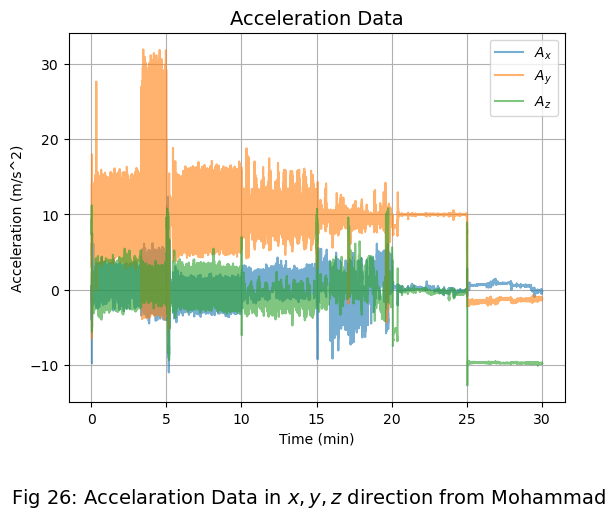

In [62]:
plt.plot(mdf.time.values/60, mdf.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(mdf.time.values/60, mdf.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(mdf.time.values/60, mdf.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (min)")
plt.grid()
plt.legend()
getCaption(26, r"Accelaration Data in $x,y,z$ direction from Mohammad")
plt.show()

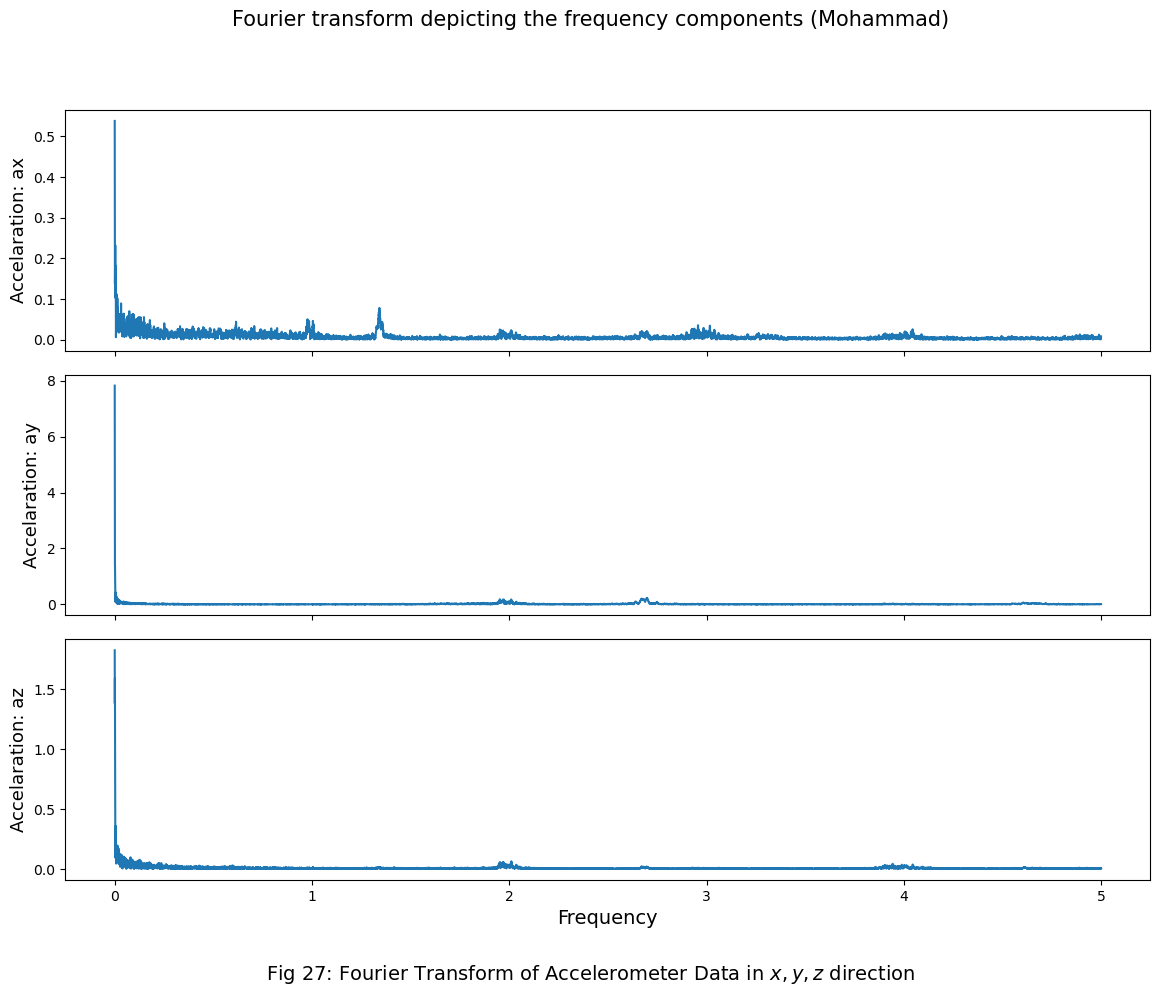

In [68]:
getFTofA("time",["ax","ay","az"], mdf,"Accelaration: ", 10, "Mohammad",27)

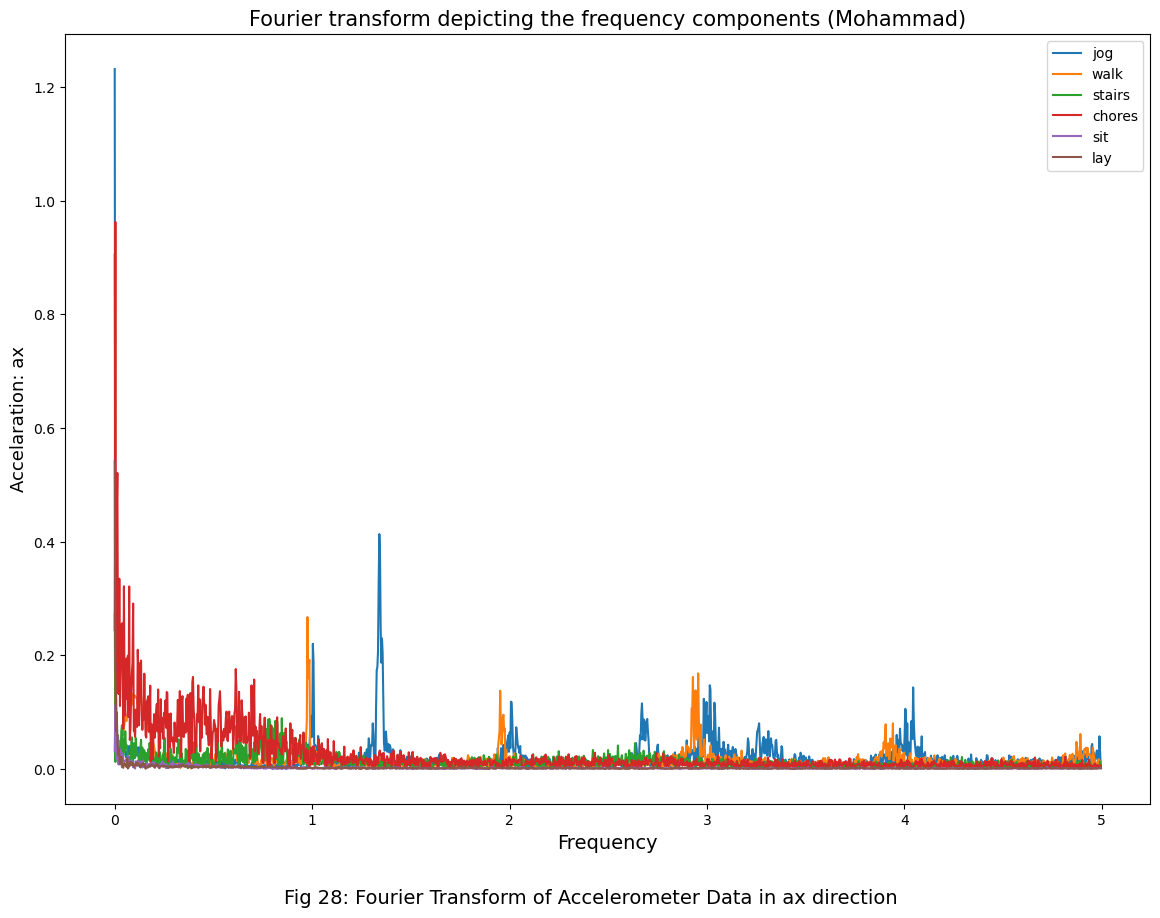

In [69]:
getFTofAwithActivities("time","ax", mdf, activities,"Accelaration: ", 10, "Mohammad",28)

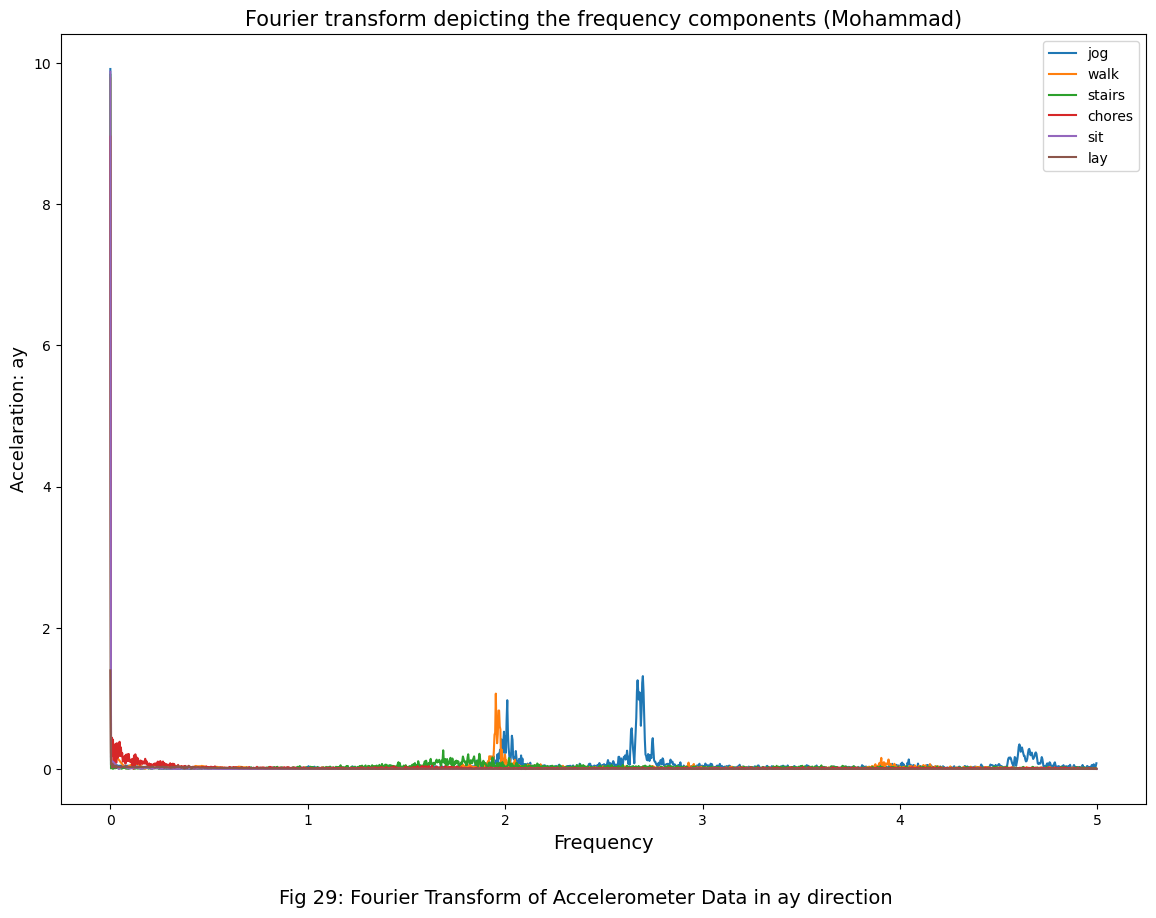

In [71]:
getFTofAwithActivities("time","ay", mdf, activities,"Accelaration: ", 10, "Mohammad",29)

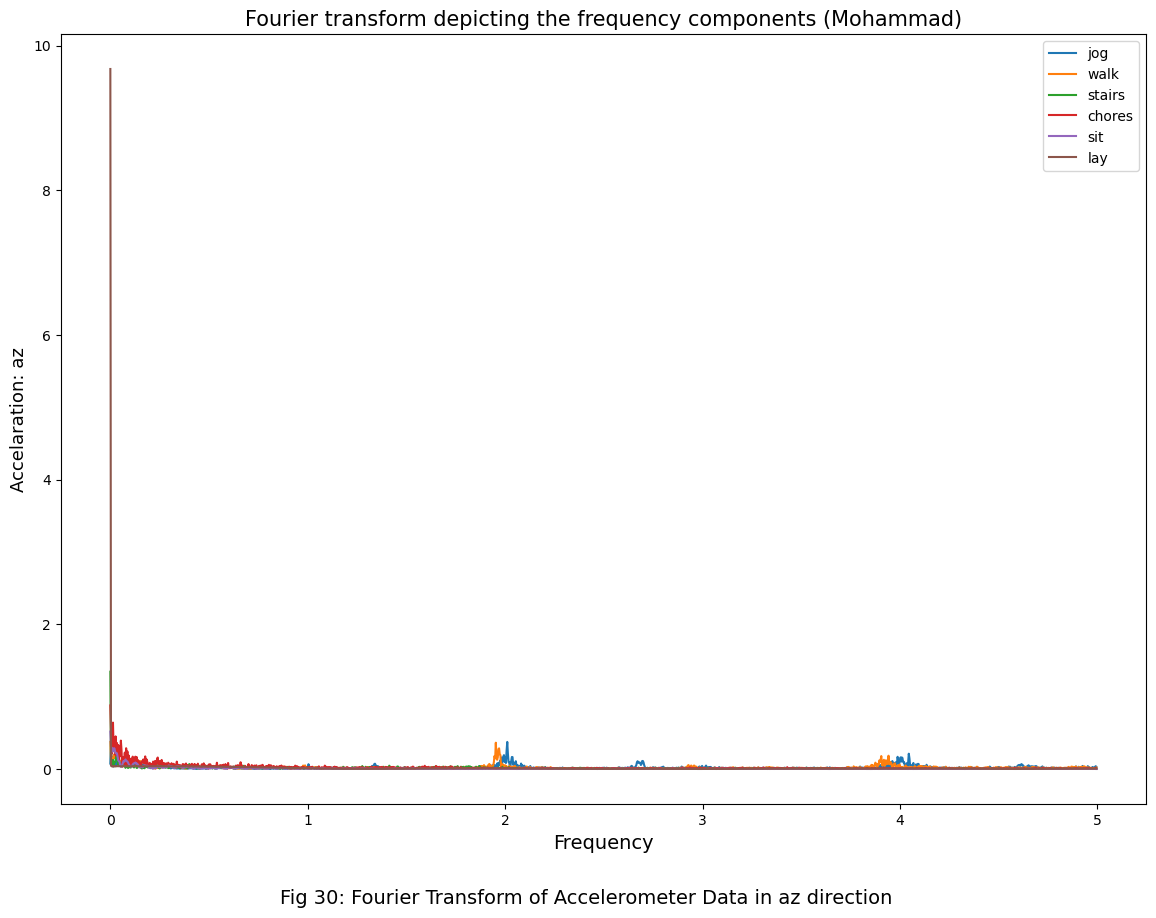

In [72]:
getFTofAwithActivities("time","az", mdf, activities,"Accelaration: ", 10, "Mohammad",30)

Redoing the analysis after filtering the gravitational data.

### Dynamic Body Data Analysis

In [76]:
x = mdf.ax.values
y = mdf.ay.values
z = mdf.az.values

sample_rate = 10
cutoff_frequency = 0.1 
signal_lenght = len(mdf.index)

A_DCx, diff_x = getFilteredData(x, cutoff_frequency, sample_rate)
A_DCy, diff_y = getFilteredData(y, cutoff_frequency, sample_rate)
A_DCz, diff_z = getFilteredData(z, cutoff_frequency, sample_rate)

In [80]:
mdf_d = pd.DataFrame()
mdf_d["time"] = mdf.time.values
mdf_d["ax"] = diff_x
mdf_d["ay"] = diff_y
mdf_d["az"] = diff_z
mdf_d["activity"] = mdf.activity.values
mdf_d

,time,ax,ay,az,activity
0,0.0,0.634097,-0.003368,0.763752,jog
1,0.1,0.746240,-0.110357,1.095651,jog
2,0.2,0.939959,-0.172292,1.261137,jog
3,0.3,0.886725,-0.241779,1.050757,jog
4,0.4,0.935781,-0.324760,1.289341,jog
...,...,...,...,...,...
17998,1799.8,-0.078695,-0.045613,-0.002363,lay
17999,1799.9,-0.077723,0.085723,0.022468,lay
18000,1800.0,0.025530,0.089336,0.003033,lay
18001,1800.1,-0.101538,0.093842,-0.069943,lay


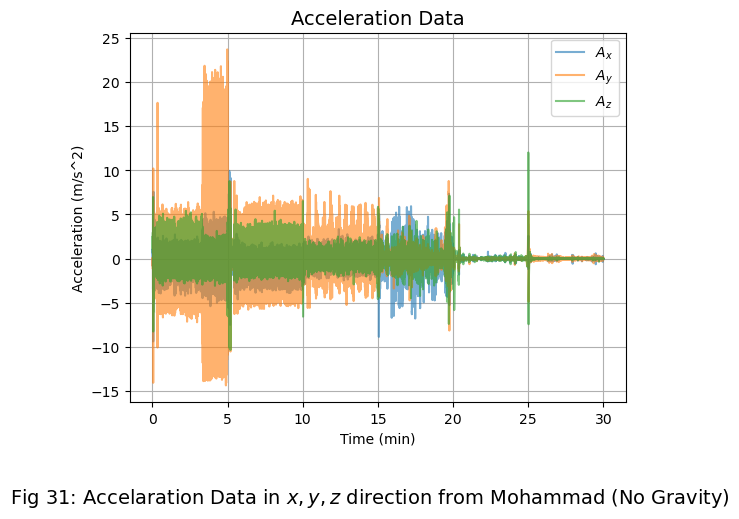

In [82]:
plt.plot(mdf_d.time.values/60, mdf_d.ax.values, label=r"$A_x$", alpha=0.6)
plt.plot(mdf_d.time.values/60, mdf_d.ay.values, label=r"$A_y$", alpha=0.6)
plt.plot(mdf_d.time.values/60, mdf_d.az.values, label=r"$A_z$", alpha=0.6)
plt.title("Acceleration Data",fontsize=14)
plt.ylabel("Acceleration (m/s^2)")
plt.xlabel("Time (min)")
plt.grid()
plt.legend()
getCaption(31, r"Accelaration Data in $x,y,z$ direction from Mohammad (No Gravity)")
plt.show()

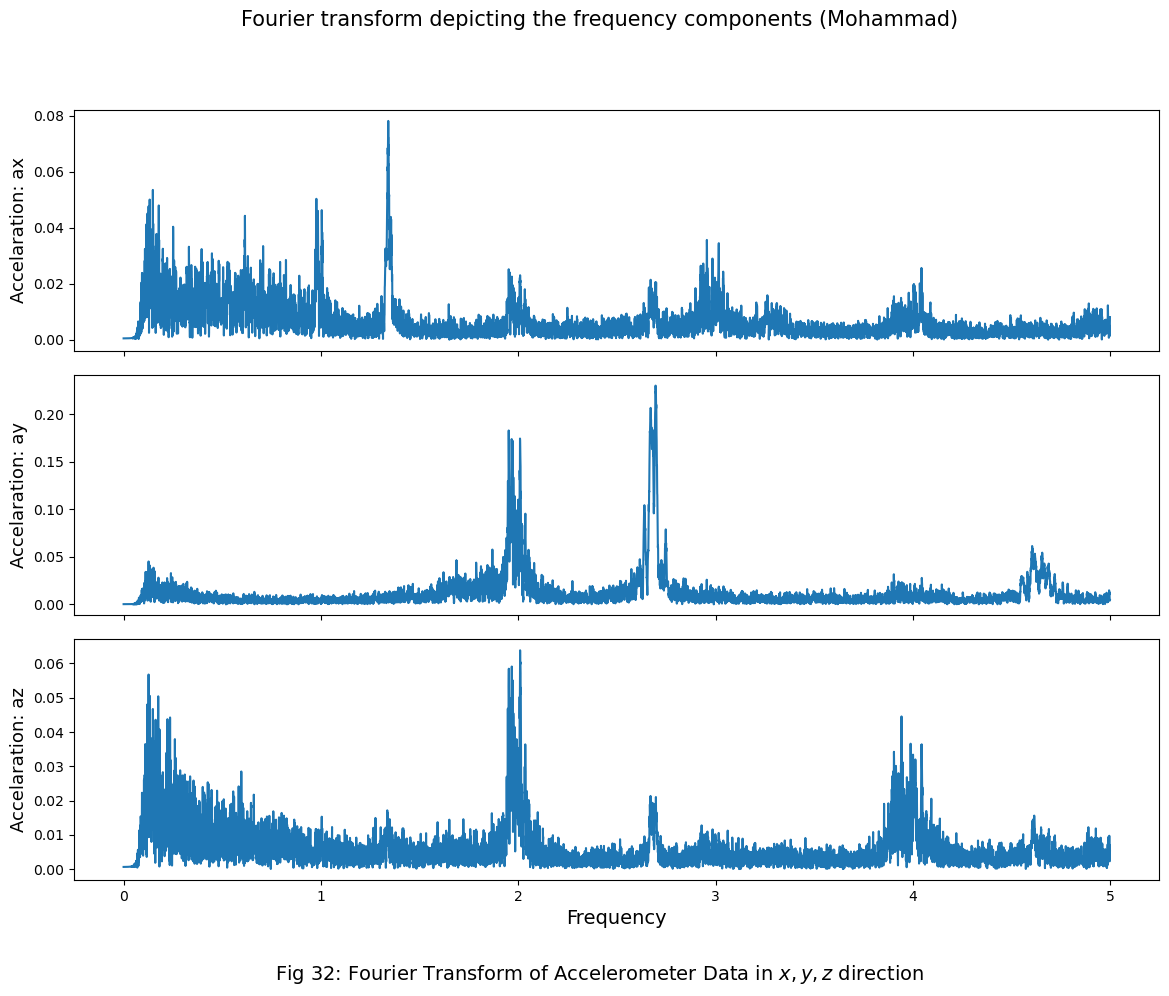

In [83]:
getFTofA("time",["ax","ay","az"], mdf_d,"Accelaration: ", 10, "Mohammad",32)

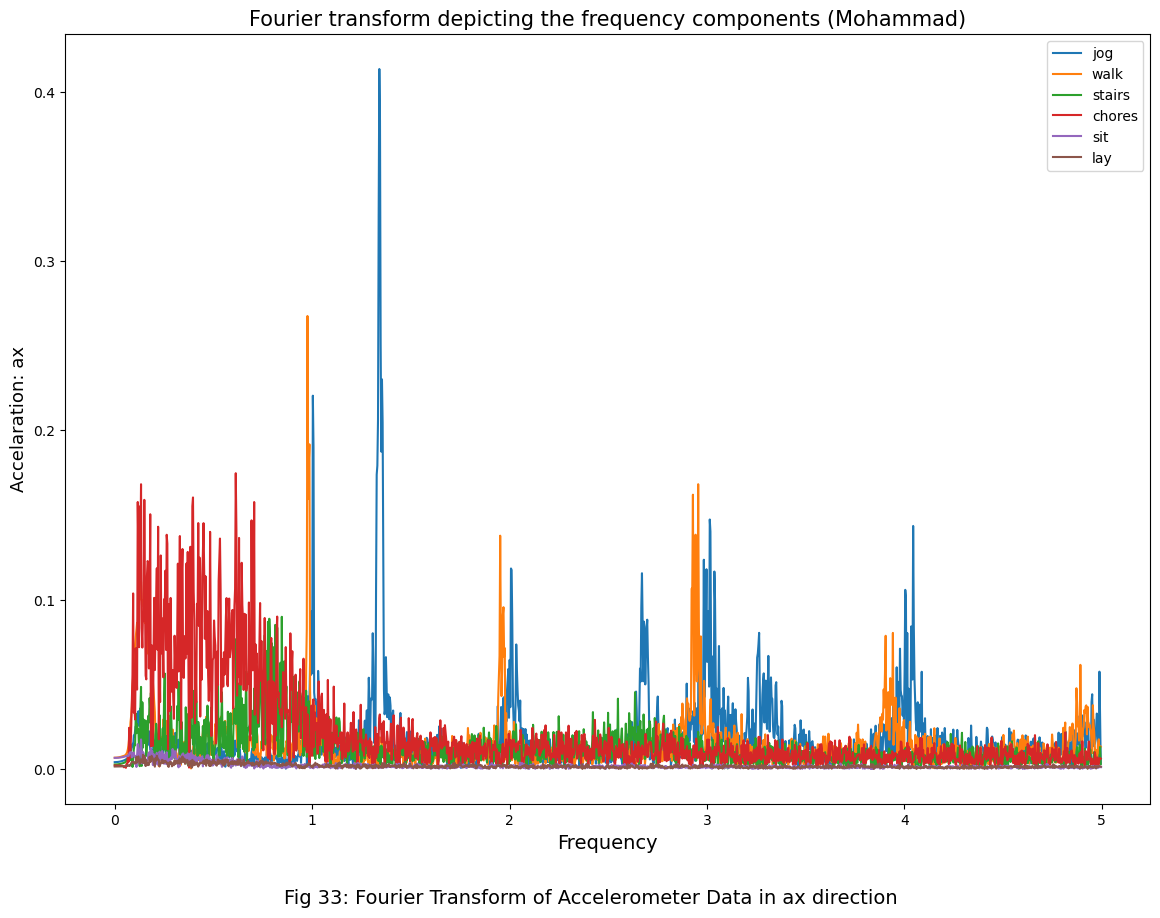

In [85]:
getFTofAwithActivities("time","ax", mdf_d, activities,"Accelaration: ", 10, "Mohammad", 33)

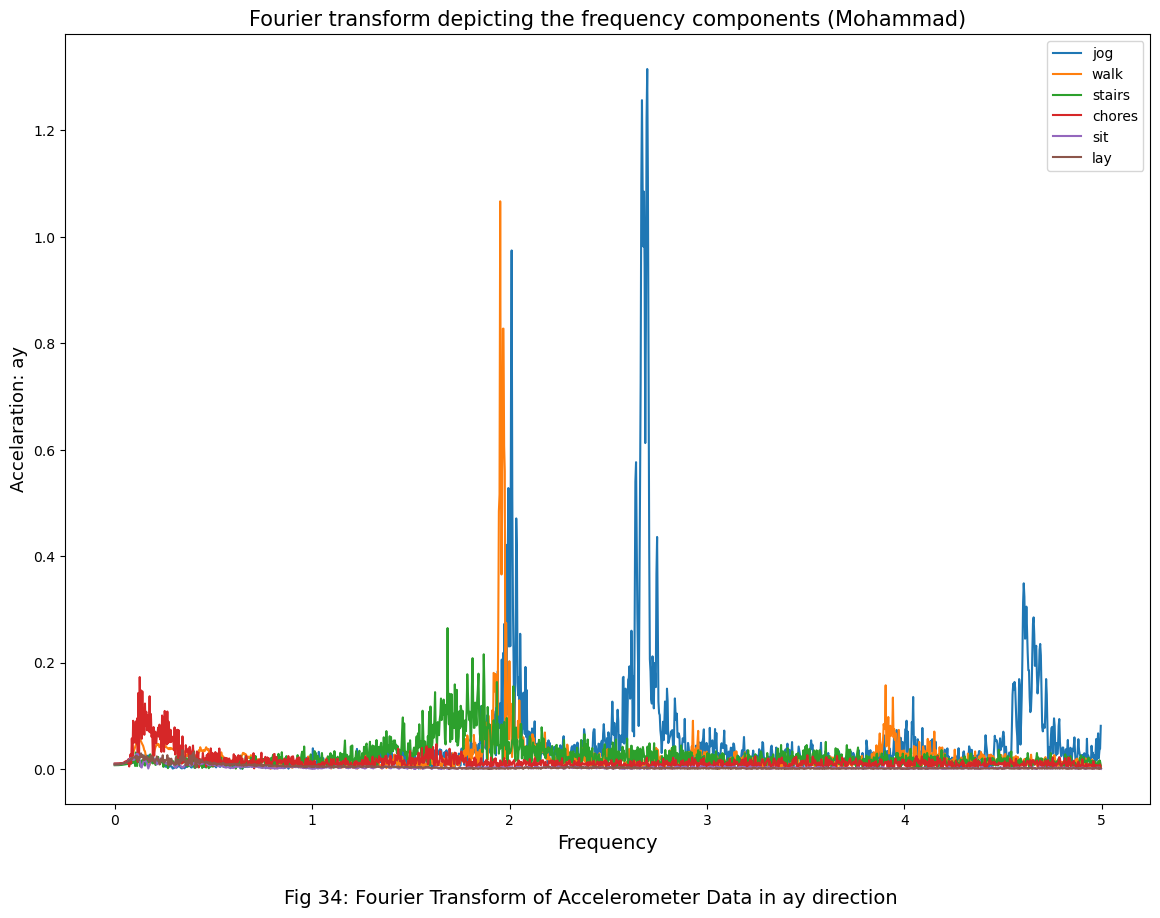

In [86]:
getFTofAwithActivities("time","ay", mdf_d, activities,"Accelaration: ", 10, "Mohammad", 34)

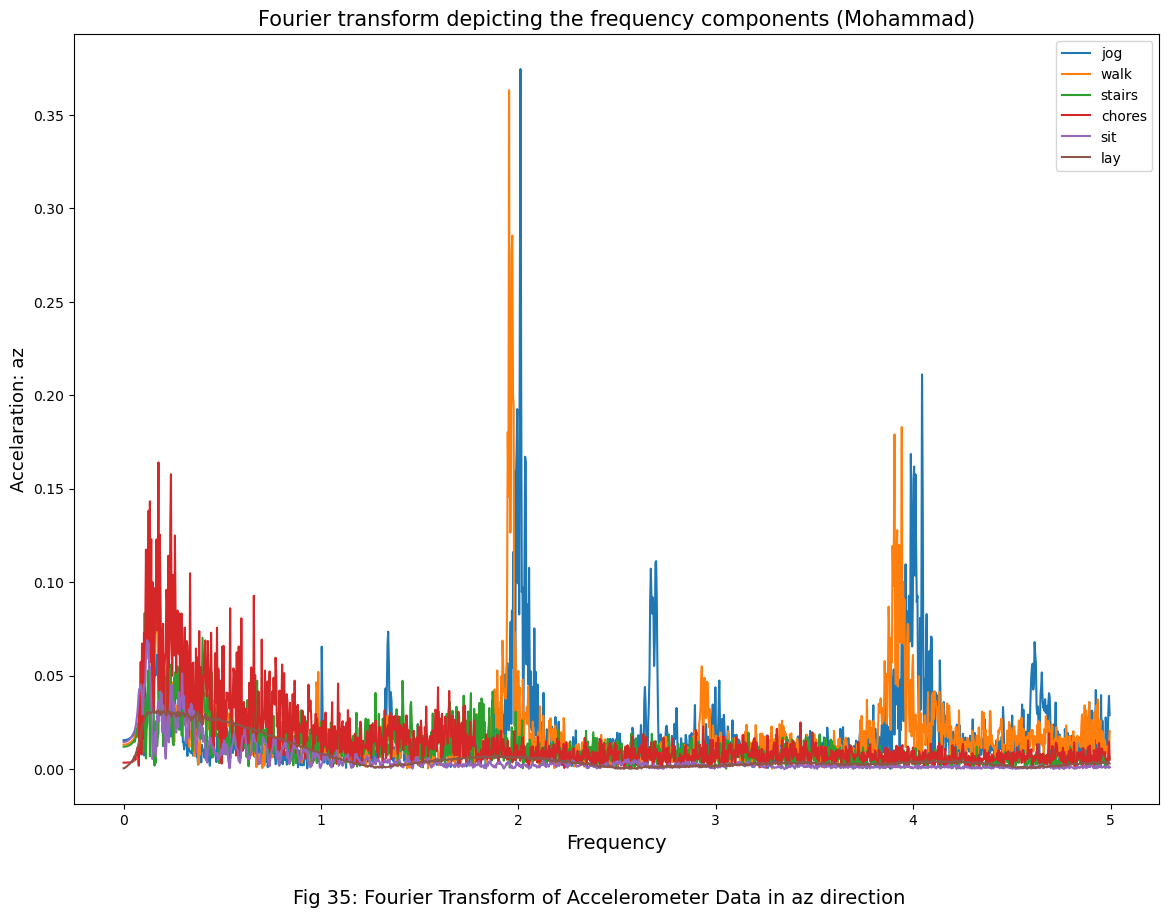

In [88]:
getFTofAwithActivities("time","az", mdf_d, activities,"Accelaration: ", 10, "Mohammad", 35)

Need to do:
- comparison of Sam and Mohammad

# Conclusion & Summary


correlations, power adjust data, eliminate lower freq data.

<span style="color:red">
    
Plan:

For the following experiments:

- exp 1:
- exp 2:

Do the following:

- Restate the goal
- Summarize procedure
- Explain results
- Comment on success
- Comment on accuracy
- Comment on error
 
</span>